In [1]:
### Investigate Roadmap data / Data from Mostafavi Paper

# Libraries

In [2]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'”


[1] "/home/icb/corinna.losert/miniconda3/envs/scgrn_R_4_1//lib/R/library"



Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: limma

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

corrplot 0.95 loaded

Loading required package: viridisLite


Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose



Attaching package: ‘MASS’


The following object is masked from ‘package:genefilter’:

    area


The following object is masked from ‘package:biomaRt’:

    select



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:data.table’:

    between, first, last


The following object is masked from ‘package:biomaRt’:

    selec

In [3]:
source('MS4_Plot_Config.r')

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


In [4]:
library(httr)


Attaching package: 'httr'


The following object is masked from 'package:Biobase':

    content




In [5]:
library(jsonlite)


Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




# Parameters

In [6]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [7]:
data_path = '../data/current/coeqtl_mapping/'

In [8]:
data_path_eqtl =  '../data/current/eqtl_mapping/'

In [9]:
coeqtl_results_path = 'co_qtls_decision_tree/'

In [11]:
# Define cell-type for which enrichments should be calculated; alternative: All
cell_type = 'All'

# Data

## Snp to RS-ID mapping

In [12]:
### SNP to RS-ID mapping from Marc-Jan

In [13]:
snp_id_mapping = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/meta-data/snp_mapping/1000G-30x.ref.gz", colClasses = 'character')

In [14]:
snp_id_mapping$alt_id = paste0(snp_id_mapping$CHR,":",snp_id_mapping$bp,":",snp_id_mapping$str_allele1,":",snp_id_mapping$str_allele2)

In [15]:
head(snp_id_mapping,2)

ID,bp,str_allele1,str_allele2,CHR,allele1,allele2,alt_id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1:10390:CCCCTAACCC:C,10390,CCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA,C,1,7466109476442969725,8576025794,1:10390:CCCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA:C
1:10399:C:A,10397,C,A,1,8576025794,8320025024,1:10397:C:A


In [16]:
snp_id_mapping[snp_id_mapping$alt_id == '6:166963191:TG:T',]

ID,bp,str_allele1,str_allele2,CHR,allele1,allele2,alt_id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
rs202200390,166963191,TG,T,6,10752064596096953,10752032341,6:166963191:TG:T


## Mostafavi Paper Scores

In [17]:
### Scores for genes

In [18]:
paper_scores = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/pc_genes.txt")

In [19]:
head(paper_scores,2)

hgnc_id,GeneSymbol,gene,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,ABC_length_per_type,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
HGNC:14825,ENSG00000186092,OR4F5,0,6.166,0.981,0.030354,1.84,0,0,⋯,0,0,0,0,4,2,1,0,0,0.004438489
HGNC:15079,ENSG00000284662,OR4F16,11,0.938,0.939,NA,NA,0,0,⋯,0,0,0,0,4,2,1,0,NA,NA


In [20]:
### Scores for genes and GO term annotation

In [21]:
paper_scores_go = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/genes_multiGO.txt")

In [22]:
head(paper_scores_go,2)

gene,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile
<chr>,<int>,<int>,<int>
HGNC:100,67,0,1
HGNC:10000,127,4,9


In [23]:
### Scores for SNPs

In [24]:
paper_scores_snps = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/snp_annotations/filter_snps.txt")

In [25]:
head(paper_scores_snps,2)

SNP,rsID,MAF,L2,TSSD,d_tss,gene
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>
10:10000018:A:G,rs6602381,0.4484750,241.935,0,-840342,HGNC:2550
10:100001867:C:T,rs150203744,0.0142392,13.134,7,26084,HGNC:17171


In [26]:
paper_scores_snps$snp_source = 'set1'

In [27]:
nrow(paper_scores_snps)

[1] 6971256

In [28]:
paper_scores_snps2 = fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/snp_annotations/filter_snps_set2.txt")

In [29]:
paper_scores_snps2$snp_source = 'set2'

In [30]:
head(paper_scores_snps2 ,2)

SNP,rsid,MAF,L2,TSSD,d_tss,gene,snp_source
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
10:10000018:A:G,rs6602381,0.448475,241.935,0,-840342,HGNC:2550,set2
10:100000625:A:G,rs7899632,0.432636,136.893,7,27326,HGNC:17171,set2


In [31]:
paper_scores_snps2$rsID = paper_scores_snps2$rsid
paper_scores_snps2$rsid = NULL

In [32]:
paper_scores_snps = rbind( paper_scores_snps, paper_scores_snps2)

In [33]:
### Aggregate to have only unique values

In [34]:
head(paper_scores_snps,2)

SNP,rsID,MAF,L2,TSSD,d_tss,gene,snp_source
<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
10:10000018:A:G,rs6602381,0.4484750,241.935,0,-840342,HGNC:2550,set1
10:100001867:C:T,rs150203744,0.0142392,13.134,7,26084,HGNC:17171,set1


In [35]:
paper_scores_snps = paper_scores_snps %>% group_by(SNP, rsID, MAF, L2, TSSD, d_tss, gene) %>% summarise(snp_source = paste0(snp_source, collapse = ';'))

`summarise()` has grouped output by 'SNP', 'rsID', 'MAF', 'L2', 'TSSD',
'd_tss'. You can override using the `.groups` argument.


In [36]:
nrow(paper_scores_snps)

[1] 7776878

In [37]:
length(unique(paper_scores_snps$SNP))

[1] 7776878

In [38]:
### get promoter / enhancer counts from paper

In [39]:
prom_enh_counts_paper =  fread("/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/Mostafavi_gene_annots/snp_annotations/promoter_enhancer.counts")

In [40]:
head(prom_enh_counts_paper ,2)

SNP,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS,Roadmap_LOEUF1_enhancer,Roadmap_LOEUF2_enhancer,Roadmap_LOEUF3_enhancer,Roadmap_LOEUF4_enhancer,Roadmap_LOEUF5_enhancer,ENCODE3_PLS_LOEUF1,ENCODE3_PLS_LOEUF2,ENCODE3_PLS_LOEUF3,ENCODE3_PLS_LOEUF4,ENCODE3_PLS_LOEUF5
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1:693731:A:G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1:707522:G:C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
### merge to paper-scores whether it is a promoter/ enhancer

In [42]:
nrow(paper_scores_snps)

[1] 7776878

In [43]:
paper_scores_snps  = merge(paper_scores_snps , prom_enh_counts_paper[,c('SNP', 'FANTOM_promoter', 'FANTOM_enhancer', 'ENCODE_PLS', 'ENCODE_pELS', 'ENCODE_dELS')], by = 'SNP', all.x = TRUE)

In [44]:
nrow(paper_scores_snps)

[1] 7776878

In [45]:
head(paper_scores_snps,2)

,SNP,rsID,MAF,L2,TSSD,d_tss,gene,snp_source,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1:100000012:G:T,rs10875231,0.235225,105.406,5,-111657,HGNC:15846,set1;set2,0,0,0,0,0
2,1:100000827:C:T,rs6678176,0.283830,115.848,5,-110842,HGNC:15846,set1;set2,0,0,0,0,0


In [46]:
length(unique(paper_scores_snps$SNP))

[1] 7776878

## Significant results

In [47]:
sign_var = '' # Define which significant results to load

In [48]:
if(sign_var  == 'q_val'){
    coeqtls = fread(paste0('/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/coeqtl_mapping/co_qtls_decision_tree/shared_results/5DS_Meta_Analysis_Sign_coeQTLs133q_val_0.1.csv'))
    }
if(sign_var  != 'q_val'){
    coeqtls = fread(paste0('/ictstr01/groups/epigenereg01/workspace/projects/grn_dev_groningen/coeqtl_mapping/co_qtls_decision_tree/shared_results/5DS_Meta_Analysis_Sign_coeQTLs133p_val_mt_eGene', '_.csv'))
    }

In [49]:
coeqtls = as.data.frame(coeqtls)

In [50]:
### Define whether to filter on specific cell-type or keep all coeqtls

In [51]:
if(cell_type != 'All'){
    coeqtls = coeqtls[ (coeqtls$cell_type == cell_type),]
    }

In [52]:
head(coeqtls,2)

,V1,snp_id,cell_type,eGene,coeGene,feature_id,triplet,dataset,n_samples,p_val_mt,⋯,eQTL_GO:MF,eQTL_REAC,eQTL_remap2022_1,eQTL_remap2022_2,eQTL_remap2022_3,eQTL_HPA,eQTL_MIRNA,eQTL_TF,coeGene_is_enriched_TF,cctqtl
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<chr>
1,1,10:112347540:T:C,Mono,ACSL5,VIM,ACSL5_VIM,10:112347540:T:C;ACSL5_VIM,meta_5ds,337,3.996531,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,
2,2,10:132255627:A:G,Mono,STK32C,SPN,SPN_STK32C,10:132255627:A:G;SPN_STK32C,meta_5ds,204,4.450337,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,


In [53]:
nrow(coeqtls)

[1] 91628

In [54]:
#sort(colnames(coeqtls))

## Tested eGenes and coeGenes

In [55]:
## Alt 1: load all eGenes per cell-type and filter on eGenes passing decision tree

In [56]:
only_dt = TRUE  # define whether to filter on only eGenes passing decision tree filter or not

In [57]:
### get tested eGenes per cell-type 

In [58]:
snp_gene_mapping_all = data.frame()

In [59]:
cell_types = c('B', 'CD4_T', 'CD8_T', 'NK', 'Mono')

In [60]:
for(i in cell_types){
    snp_gene_mapping = read.csv(paste0(data_path_eqtl, 'sc_eqtlgen_final/'  , i, '_snp_egene_mapping.csv'))
    snp_gene_mapping$cell_type = i
    
    snp_gene_mapping_all = rbind(snp_gene_mapping, snp_gene_mapping_all)
    }
    

In [61]:
head(snp_gene_mapping_all,2)

,X,feature_id,snp_id,feature_start,feature_end,p_value,beta,cell_type
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,CD52,1:26306290:C:T,26317957,26320523,1.903053e-214,-1.0420481,Mono
2,2,CD52,1:26358699:C:T,26317957,26320523,2.438329e-19,0.3022236,Mono


In [62]:
## Load genes passing decision tree filter in the different datasets

In [63]:
cell_types = c( 'B', 'NK', 'Mono', 'CD8_T' , 'CD4_T')

In [64]:
gene_list = data.frame()

In [65]:
datasets_to_load = c('Franke_v2', 'Franke_v3', 'wijst', 'oneK1K', 'multiome')

In [66]:
for(j in datasets_to_load){
    for(i in cell_types){
        gene_list_input = fread(paste0(data_path, coeqtl_results_path , '/correlation_input/', 'F11_Decision_Tree_Geneswg3_',j,'_' , i, '.Qced.Normalized.SCs.Rds.tsv'), header = FALSE)
        gene_list_input$cell_type = i
        gene_list_input$dataset = j
        gene_list = rbind(gene_list, gene_list_input)
        }
    }

In [67]:
head(gene_list_input,2)

V1,cell_type,dataset
<chr>,<chr>,<chr>
A2M,CD4_T,multiome
A2M-AS1,CD4_T,multiome


In [68]:
### unique gene list per cell-type

In [69]:
 gene_list= unique( gene_list[,c('cell_type', 'V1')])

In [70]:
head( gene_list,2)

cell_type,V1
<chr>,<chr>
B,x
B,AC004687.1


In [71]:
colnames( gene_list) = c('cell_type', 'gene')

In [72]:
### Filter on only genes passing decision tree filter

In [73]:
head(snp_gene_mapping_all,2)

,X,feature_id,snp_id,feature_start,feature_end,p_value,beta,cell_type
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,1,CD52,1:26306290:C:T,26317957,26320523,1.903053e-214,-1.0420481,Mono
2,2,CD52,1:26358699:C:T,26317957,26320523,2.438329e-19,0.3022236,Mono


In [74]:
only_dt

[1] TRUE

In [75]:
if(only_dt == TRUE){
snp_gene_mapping = merge(snp_gene_mapping_all, gene_list, by.x = c('feature_id', 'cell_type'),
                             by.y = c('gene', 'cell_type'))
    }

In [76]:
### Filter the genes on a specific cell-type or in case of All use all eGenes after decision tree as background

In [77]:
if(cell_type != 'All'){
    snp_gene_mapping = snp_gene_mapping[snp_gene_mapping$cell_type == cell_type,]
    }
if(cell_type == 'All'){
    snp_gene_mapping = snp_gene_mapping
    }

In [78]:
head(snp_gene_mapping ,2)

,feature_id,cell_type,X,snp_id,feature_start,feature_end,p_value,beta
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,A1BG,B,1348,19:58406208:G:A,58345178,58353499,4.333125e-07,-0.1954896
2,A1BG,CD4_T,3178,19:58497199:G:A,58345178,58353499,2.302583e-13,-0.2558016


In [79]:
snp_gene_mapping  %>% group_by(cell_type) %>% summarise(amount_egenes = length(unique(feature_id)))

cell_type,amount_egenes
<chr>,<int>
B,1695
CD4_T,3687
CD8_T,2031
Mono,1759
NK,1928


In [80]:
length(unique(snp_gene_mapping$feature_id))

[1] 5309

## Summary Stats

In [81]:
summary_stats_info = data.frame()

In [82]:
datasets_to_load = c('Franke_split_v2', 'Franke_split_v3', 'wijst2018', 'oneK1k', 'multiome')

In [83]:
for(i in datasets_to_load){
    for (j in cell_types){
        if(file.exists(paste0( "../data/current/summary_stats/D1_Sample_gene_statisticwg3_", i, j, ".Qced.Normalized.SCs.Rds.csv"))){
          
                result_file = fread( paste0( "../data/current/summary_stats/D1_Sample_gene_statisticwg3_", i, j, ".Qced.Normalized.SCs.Rds.csv")) # F12_Tests_after_filtering_normalized.csv --> after decision tree filtering; F3_decision_tree_input.csv

                result_file$dataset = i
                result_file$cell_type = j 
            
                ### aggregate on a gene level
                result_file = result_file %>% group_by(dataset, cell_type, gene) %>% summarise(amount_samples_non_zero = n(),
                                                                                 mean_amount_cells = mean(amount_cells),
                                                                                 mean_expression = mean(mean_counts),
                                                                                 mean_percentage_zero = mean(percentage_zero),
                                                                                 mean_non_zero_counts = mean(amount_non_zero_counts))
                #result_file$p_val_mt = NULL   # TBD: remove when this information has been added to all result files
                #result_file$q_val = NULL
                #result_file$co_egene = NULL
                summary_stats_info  = rbind(result_file, summary_stats_info )
    
            }
    }
    }
    

`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'dataset', 'cell_type'. You can override
using the `.groups` argument.
`summarise()` has grouped output by '

In [84]:
head(summary_stats_info,2)

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,CD4_T,A1BG,113,549.8584,0.02652148,96.37977,18.04425
multiome,CD4_T,A1BG-AS1,131,567.7023,0.02241428,96.97602,16.20611


In [85]:
unique(summary_stats_info$cell_type)

[1] "CD4_T" "CD8_T" "Mono"  "NK"    "B"

In [86]:
### Adjust the dataset info

In [87]:
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'wijst2018', 'wijst')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'Franke_split_v2', 'Franke_v2')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'Franke_split_v3', 'Franke_v3')
summary_stats_info$dataset = str_replace(summary_stats_info$dataset, 'oneK1k', 'oneK1K')

In [88]:
unique(summary_stats_info$dataset)

[1] "multiome"  "oneK1K"    "wijst"     "Franke_v3" "Franke_v2"

In [89]:
unique(summary_stats_info[,c('dataset', 'cell_type')]) %>% group_by(dataset) %>% dplyr::count()

dataset,n
<chr>,<int>
Franke_v2,5
Franke_v3,5
multiome,5
oneK1K,5
wijst,5


In [90]:
head(summary_stats_info,2)

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,CD4_T,A1BG,113,549.8584,0.02652148,96.37977,18.04425
multiome,CD4_T,A1BG-AS1,131,567.7023,0.02241428,96.97602,16.20611


In [91]:
summary_stats_info[(summary_stats_info$gene == 'A1BG') & (summary_stats_info$cell_type == 'CD4_T'),]

dataset,cell_type,gene,amount_samples_non_zero,mean_amount_cells,mean_expression,mean_percentage_zero,mean_non_zero_counts
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
multiome,CD4_T,A1BG,113,549.8584,0.02652148,96.37977,18.04425
oneK1K,CD4_T,A1BG,1012,474.6630,0.10414159,90.48451,44.59091
wijst,CD4_T,A1BG,37,274.6757,0.09206075,91.33705,22.91892
Franke_v3,CD4_T,A1BG,47,357.6596,0.15977212,86.07066,51.08511
Franke_v2,CD4_T,A1BG,86,409.1395,0.08670870,91.87012,33.19767


In [92]:
### Calculate weighted mean expression per Gene)

In [93]:
summary_stats_info_meta = summary_stats_info %>% group_by(gene, cell_type) %>% summarise(weighted_mean_expression = sum((mean_expression * amount_samples_non_zero))/sum(amount_samples_non_zero))

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


In [94]:
if(cell_type != 'All'){
    summary_stats_info_meta = summary_stats_info_meta[summary_stats_info_meta$cell_type == cell_type ,]
    }

In [95]:
if(cell_type == 'All'){
    summary_stats_info_meta =  summary_stats_info_meta %>% group_by(gene) %>% summarise(weighted_mean_expression = mean(weighted_mean_expression))
    }

In [96]:
unique(summary_stats_info_meta$cell_type)

Warning message:
"Unknown or uninitialised column: `cell_type`."


NULL

In [97]:
head(summary_stats_info_meta,2)

gene,weighted_mean_expression
<chr>,<dbl>
A1BG,0.13038935
A1BG-AS1,0.03941786


# Analyze

## Define sign and non sign egenes and snps

In [98]:
unique(coeqtls$cell_type)

[1] "Mono"  "CD4_T" "CD8_T" "NK"    "B"

In [99]:
### Define list of significant eGenes per cell-type only on eGene level

In [100]:
### Any egene that is significant coeqtl in the cell-type or in any cell-type in the coeqtl data 
sign_egenes = data.frame(eGene = unique(coeqtls[coeqtls$type == 'unique',c('eGene')]), sign = 1)
### All the eGenes (that passed the decision tree filter) that are not coeqtls as background
non_sign_egenes = data.frame(eGene = unique(snp_gene_mapping$feature_id[(!snp_gene_mapping$feature_id %in% coeqtls$eGene) ]), sign = 0)


In [101]:
head(sign_egenes,2)

,eGene,sign
,<chr>,<dbl>
1,ACSL5,1
2,STK32C,1


In [102]:
egene_data = rbind(sign_egenes, non_sign_egenes)

In [103]:
head(egene_data,2)

,eGene,sign
,<chr>,<dbl>
1,ACSL5,1
2,STK32C,1


In [104]:
### Overview eGenes with coeqtl effect vs. eGenes without coeqtl effect

In [105]:
egene_data %>% group_by(sign) %>% summarise(n = length(unique(eGene)))

sign,n
<dbl>,<int>
0,5008
1,301


In [106]:
egene_data =egene_data[is.na(str_extract(egene_data$eGene, '_')),] # remove not clearly assignable eGenes

In [107]:
### Define a list of eGene SNPs with coeqtl effect vs. without coeqtl efect

In [108]:
head(snp_gene_mapping,2)   # all egenes + snps (that passed decision tree filter) and were tested

,feature_id,cell_type,X,snp_id,feature_start,feature_end,p_value,beta
,<chr>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,A1BG,B,1348,19:58406208:G:A,58345178,58353499,4.333125e-07,-0.1954896
2,A1BG,CD4_T,3178,19:58497199:G:A,58345178,58353499,2.302583e-13,-0.2558016


In [109]:
coeqtls$sign = 1  # add information about being significant coeqtl to coeqtl data

In [110]:
nrow(snp_gene_mapping)

[1] 14500

In [111]:
### Merge information on whether the snp was part of a significant coeqtl in the cell-type to all the tests
    
sign_snps = merge(snp_gene_mapping, unique(coeqtls[coeqtls$type == 'unique',c('eGene', 'cell_type', 'snp_id', 'sign')]), by.x = c('feature_id', 'cell_type', 'snp_id'), by.y  = c('eGene', 'cell_type', 'snp_id'), all.x = TRUE)


In [112]:
nrow(sign_snps)

[1] 14500

In [113]:
head(sign_snps,2)

,feature_id,cell_type,snp_id,X,feature_start,feature_end,p_value,beta,sign
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,A1BG,B,19:58406208:G:A,1348,58345178,58353499,4.333125e-07,-0.1954896,NA
2,A1BG,CD4_T,19:58357814:C:A,3177,58345178,58353499,2.793323e-17,-0.2565681,NA


In [114]:
### When no sign snp (sign = 0)

In [115]:
sign_snps$sign[is.na(sign_snps$sign)] = 0

In [116]:
unique(sign_snps$sign)

[1] 0 1

In [117]:
### In case of analysis across all cell-types - take snp as significant snp if in any cell-type (SNP might have coeqt

In [118]:
if(cell_type == 'All'){
    sign_snps = sign_snps %>% group_by(feature_id, snp_id, feature_start, feature_end) %>% summarise(sign = max(sign))
    }

`summarise()` has grouped output by 'feature_id', 'snp_id', 'feature_start'.
You can override using the `.groups` argument.


In [119]:
nrow(sign_snps)

[1] 12199

In [120]:
nrow(unique(sign_snps[,c('feature_id', 'snp_id')]))

[1] 12199

In [121]:
head(sign_snps,2)

feature_id,snp_id,feature_start,feature_end,sign
<chr>,<chr>,<int>,<int>,<dbl>
A1BG,19:58357814:C:A,58345178,58353499,0
A1BG,19:58358468:AGT:A,58345178,58353499,0


In [122]:
#sign_snps %>% group_by(feature_id) %>% dplyr::count()

## Add Paper Scores to the Data

In [123]:
## Merge the gene level paper scores to egene level data

In [124]:
nrow(egene_data)

[1] 5309

In [125]:
egene_data = merge(egene_data, paper_scores, by.x = 'eGene', by.y = 'gene')

In [126]:
egene_data = merge(egene_data, paper_scores_go, by.x = 'hgnc_id', by.y = 'gene', all.x = TRUE)

In [127]:
nrow(egene_data)  # some eGenes are not in score data

[1] 5135

In [128]:
head(egene_data,2)

,hgnc_id,eGene,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile
,<chr>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,HGNC:10009,RHD,0,ENSG00000187010,8,58.052,1.482,2.8534e-05,0.951,3,⋯,0,1,1,1,0,0,0.0004460166,13,0,1
2,HGNC:10020,RIPK2,1,ENSG00000104312,4,33.258,1.623,3.9282e-01,0.441,128,⋯,1,9,5,1,0,0,0.0733464300,223,9,10


In [129]:
### Merge the scores to the snp level data

In [130]:
head(sign_snps,2)

feature_id,snp_id,feature_start,feature_end,sign
<chr>,<chr>,<int>,<int>,<dbl>
A1BG,19:58357814:C:A,58345178,58353499,0
A1BG,19:58358468:AGT:A,58345178,58353499,0


In [131]:
### Extract the snp-pos of the snp-id

In [132]:
sign_snps$snp_pos = str_replace(sign_snps$snp_id, ':[A-Z].*', '')

In [133]:
sign_snps$chr = str_replace(sign_snps$snp_pos, ':.*', '')
sign_snps$pos = str_replace(sign_snps$snp_pos, '.*:', '')

In [134]:
length(unique(sign_snps$snp_pos))

[1] 11486

In [135]:
head(sign_snps,2)

feature_id,snp_id,feature_start,feature_end,sign,snp_pos,chr,pos
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
A1BG,19:58357814:C:A,58345178,58353499,0,19:58357814,19,58357814
A1BG,19:58358468:AGT:A,58345178,58353499,0,19:58358468,19,58358468


In [136]:
nrow(sign_snps)

[1] 12199

In [137]:
#head(snp_id_mapping,2)

In [138]:
#head(unique(snp_id_mapping$ID),50)

In [139]:
### Map the RS-IDs from SNP Id Mapping by MJ to the sign snps

In [140]:
sign_snps$rsId = snp_id_mapping$ID[match(sign_snps$snp_id,snp_id_mapping$alt_id)]

In [141]:
head(sign_snps,2)

feature_id,snp_id,feature_start,feature_end,sign,snp_pos,chr,pos,rsId
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>
A1BG,19:58357814:C:A,58345178,58353499,0,19:58357814,19,58357814,rs12461352
A1BG,19:58358468:AGT:A,58345178,58353499,0,19:58358468,19,58358468,rs5828758


In [142]:
nrow(sign_snps)

[1] 12199

In [143]:
### Check cases where no rs-id could be mapped

In [144]:
sign_snps[is.na(sign_snps$rsId),] 

feature_id,snp_id,feature_start,feature_end,sign,snp_pos,chr,pos,rsId
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>


In [145]:
## remove rows without mapped rs-id
sign_snps = sign_snps[!is.na(sign_snps$rsId),]

In [146]:
nrow(sign_snps)

[1] 12199

In [147]:
unique(sign_snps$sign)

[1] 0 1

In [148]:
### Merge the snp level paper scores based on the rs ID

In [149]:
head(paper_scores_snps,2)

,SNP,rsID,MAF,L2,TSSD,d_tss,gene,snp_source,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1:100000012:G:T,rs10875231,0.235225,105.406,5,-111657,HGNC:15846,set1;set2,0,0,0,0,0
2,1:100000827:C:T,rs6678176,0.283830,115.848,5,-110842,HGNC:15846,set1;set2,0,0,0,0,0


In [150]:
nrow(paper_scores_snps)

[1] 7776878

In [151]:
length(unique(paper_scores_snps$SNP))   # unique

[1] 7776878

In [152]:
sign_snps = merge(sign_snps, paper_scores_snps, by.x = 'rsId', by.y = 'rsID', all.x = TRUE)

In [153]:
nrow(sign_snps)

[1] 12199

In [154]:
### Amount of cases where SNP rs-id is not in paper scores from Mostafavi

In [155]:
nrow(sign_snps[is.na(sign_snps$rsID),])

[1] 0

In [156]:
### Amount of cases without matched characteristics
nrow(sign_snps[is.na(sign_snps$gene),])

[1] 1551

In [157]:
### Calculate the distance of the snp to the TSS of the eGene

In [158]:
sign_snps$pos = as.numeric(str_replace(sign_snps$snp_pos, '.*:', ''))

In [159]:
tail(sign_snps,2)

,rsId,feature_id,snp_id,feature_start,feature_end,sign,snp_pos,chr,pos,SNP,⋯,L2,TSSD,d_tss,gene,snp_source,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
12198,rs999784,RPS3A,4:150287626:C:T,151099573,151104652,0,4:150287626,4,150287626,4:151208778:C:T,⋯,241.131,3,209181,HGNC:19002,set2,NA,NA,NA,NA,NA
12199,rs9998837,UBA6,4:67691068:A:G,67612652,67701179,0,4:67691068,4,67691068,4:68556786:A:G,⋯,222.582,7,10087,HGNC:25581,set1;set2,0,0,0,0,0


In [160]:
### TBD: how to calculate distance
#sign_snps$distance_gene = ((sign_snps$feature_end + sign_snps$feature_start)/2 ) - sign_snps$pos   # based on middle of gene

sign_snps$distance_gene =  NA
sign_snps$distance_gene[sign_snps$feature_start > sign_snps$pos] = sign_snps$feature_start[sign_snps$feature_start > sign_snps$pos] - sign_snps$pos[sign_snps$feature_start > sign_snps$pos]
sign_snps$distance_gene[sign_snps$feature_start < sign_snps$pos] = sign_snps$pos[sign_snps$feature_start < sign_snps$pos] - sign_snps$feature_end[sign_snps$feature_start < sign_snps$pos]# based on start of gene

In [161]:
#head(sign_snps[is.na(sign_snps$gene),],10)

In [162]:
## Merge the eGene paper scores to the sign- snps info

In [163]:
nrow(sign_snps)

[1] 12199

In [164]:
sign_snps = merge(sign_snps, paper_scores, by.x = 'feature_id', by.y = 'gene', all.x = TRUE)

In [165]:
nrow(sign_snps)

[1] 12199

In [166]:
nrow(unique(sign_snps[,c('feature_id', 'snp_id')]))

[1] 12199

In [167]:
### Convert sign column to character for plotting

In [168]:
egene_data$sign = as.character(egene_data$sign)

## Add mean expression to the data

In [169]:
head(egene_data,2)

,hgnc_id,eGene,sign,GeneSymbol,TSSD,length,CDS_length,pLI,LOEUF,ABC_count,⋯,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,GO_BP_count,GO_BP_count_400_auc,GO_BP_count_400_auc_decile
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,HGNC:10009,RHD,0,ENSG00000187010,8,58.052,1.482,2.8534e-05,0.951,3,⋯,0,1,1,1,0,0,0.0004460166,13,0,1
2,HGNC:10020,RIPK2,1,ENSG00000104312,4,33.258,1.623,3.9282e-01,0.441,128,⋯,1,9,5,1,0,0,0.0733464300,223,9,10


In [170]:
head(summary_stats_info_meta,2)

gene,weighted_mean_expression
<chr>,<dbl>
A1BG,0.13038935
A1BG-AS1,0.03941786


In [171]:
nrow(egene_data)

[1] 5135

In [172]:
egene_data = merge(egene_data, summary_stats_info_meta, by.x = 'eGene', by.y = 'gene', all.x = TRUE)

In [173]:
nrow(egene_data)

[1] 5135

# Compare Paper Score: with coeqtl effect vs. without coeqtl effect

## TSS Count

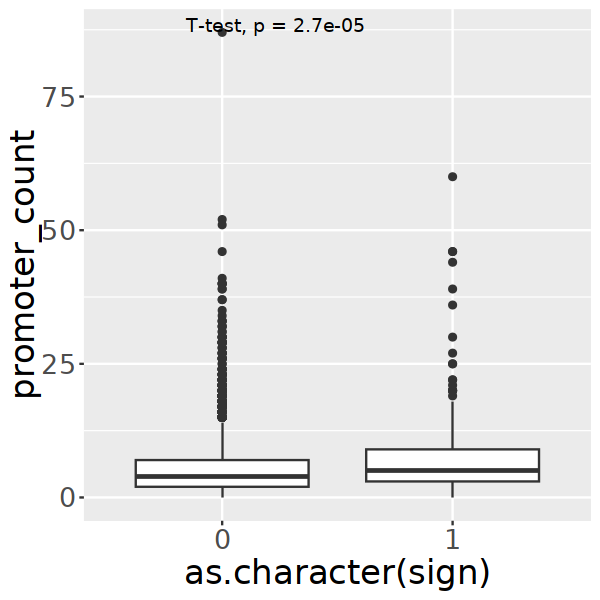

In [174]:
# Check out the TSS count across biosamples, processed using data from the FANTOM project
options(repr.plot.width = 5,repr.plot.height =5)
ggplot(egene_data, aes(x=as.character(sign), y=promoter_count)) + 
    geom_boxplot()  + stat_compare_means(method = "t.test") + theme(text = element_text(size = 20)) 

In [175]:
egene_data %>% group_by(sign) %>% summarise(mean_promoter_count = mean(promoter_count))

sign,mean_promoter_count
<chr>,<dbl>
0,5.476053
1,7.419244


In [176]:
t_test_p = t.test(egene_data$promoter_count ~ egene_data$sign)$p.value

In [177]:
t_test_p

[1] 2.737927e-05

In [178]:
t.test(egene_data$promoter_count ~ egene_data$sign)


	Welch Two Sample t-test

data:  egene_data$promoter_count by egene_data$sign
t = -4.2588, df = 305.86, p-value = 2.738e-05
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -2.841022 -1.045360
sample estimates:
mean in group 0 mean in group 1 
       5.476053        7.419244 


In [179]:
# Check out the TSS count across biosamples, processed using data from the FANTOM project
options(repr.plot.width = 5, repr.plot.height = 3)
tss_plot <- ggplot(egene_data, aes(x = as.character(sign), y = promoter_count, fill = as.character(sign))) + 
    geom_boxplot(outlier.shape = NA) +  # Removes outliers from the plot but keeps all data for calculations
    stat_compare_means(method = "t.test", vjust =-3, hjust = 1) + 
    xlab('is coeqtl') + 
    ggtitle(cell_type) +  plot_config + coeqtl_fill + coord_flip() + theme(axis.title.y = element_blank())# + ylim(quantile(egene_data$promoter_count, probs = c(0.01, 0.99)))

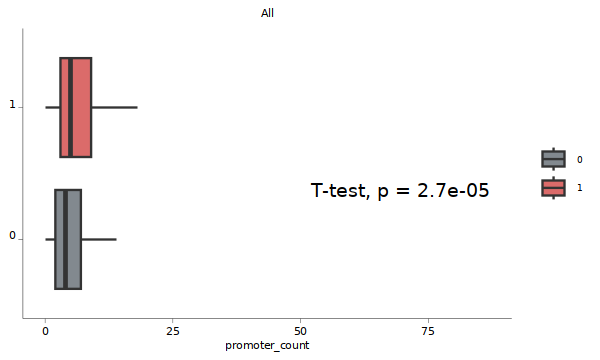

In [180]:
tss_plot

In [181]:
### Save the plot

In [182]:
pdf(paste0('figures/I1/I1_TSS_Count_Fantom_Boxplot_', cell_type, '.pdf'), width =3, height = 3)
tss_plot
dev.off()

pdf 
  2

In [183]:
promoter_summary = egene_data %>% group_by(sign) %>% summarise(mean_promoter_count = mean(promoter_count), sd_promoter_count = sd(promoter_count),
                                                              median_promoter_count = median(promoter_count), quant_25 = quantile(promoter_count, probs = c(0.25)),
                                                              quant_75 =quantile(promoter_count, probs = c(0.75) ), amount_obs = n())

In [184]:
promoter_summary

sign,mean_promoter_count,sd_promoter_count,median_promoter_count,quant_25,quant_75,amount_obs
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,5.476053,5.148872,4,2,7,4844
1,7.419244,7.680439,5,3,9,291


In [185]:
promoter_summary$text = 'eQTL with co-eQTL effect'
promoter_summary$text[promoter_summary$sign == 0] = 'eQTL without co-eQTL effect'

In [186]:
promoter_summary$text = factor(promoter_summary$text, levels = c( 'eQTL without co-eQTL effect', 'eQTL with co-eQTL effect'))

In [187]:
t_test_p

[1] 2.737927e-05

In [188]:
cell_type

[1] "All"

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


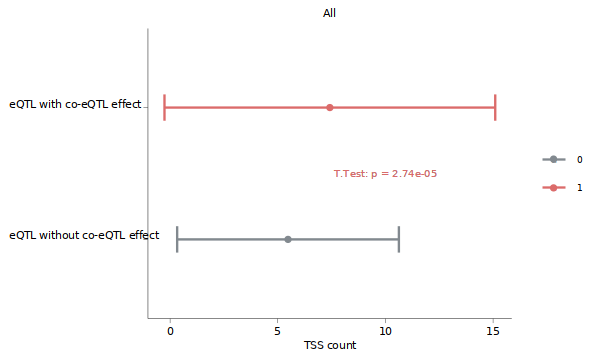

In [189]:
# Create the plot
tss_plot_alt = ggplot(promoter_summary, aes(x = text, y = mean_promoter_count, color = sign)) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin = mean_promoter_count - sd_promoter_count, 
                    ymax =mean_promoter_count + sd_promoter_count), 
                width = 0.2, size = 0.5) +  plot_config + coord_flip() + coeqtl_col + ylab('TSS count')  + theme(axis.title.y = element_blank()) + geom_text(aes(x = 1.5, y = 10, label = paste0('T.Test: p = ' ,  signif(t_test_p, digits = 3))), size = 2
            ) + ggtitle(cell_type)
tss_plot_alt

In [190]:
pdf(paste0('figures/I1/I1_TSS_Count_Fantom_Mean_SD_Plot_', cell_type, '.pdf'), width =3.5, height = 1.5)
tss_plot_alt
dev.off()

pdf 
  2

In [191]:
promoter_summary$t_test_p = t_test_p

In [192]:
promoter_summary

sign,mean_promoter_count,sd_promoter_count,median_promoter_count,quant_25,quant_75,amount_obs,text,t_test_p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<dbl>
0,5.476053,5.148872,4,2,7,4844,eQTL without co-eQTL effect,2.737927e-05
1,7.419244,7.680439,5,3,9,291,eQTL with co-eQTL effect,2.737927e-05


In [193]:
### save data for plot
write.csv(promoter_summary, paste0('figures/I1/I1_TSS_Count_Fantom_Mean_SD_Plot_', cell_type, '_data.csv'))

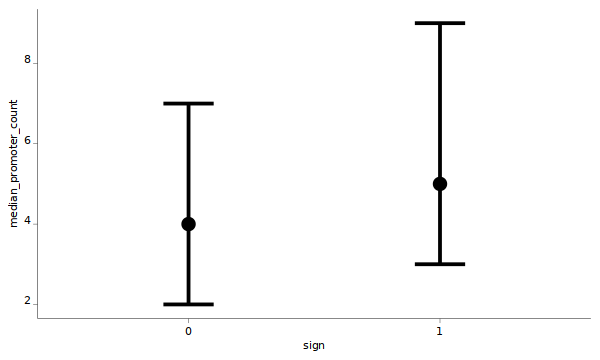

In [194]:
# Create the plot
ggplot(promoter_summary, aes(x = sign, y = median_promoter_count)) +
  geom_point(size = 3) +                                  # Plot points
  geom_errorbar(aes(ymin = quant_25, 
                    ymax = quant_75), 
                width = 0.2, size = 0.8) +  plot_config 

## Roadmap Features

### Evaluate with linear model (coeqtl vs. no coeqtl)

In [922]:
## Var 1: coeqtl vs. no coeqtl (without random snps)

In [923]:
colnames(sign_snps)

[1] "feature_id"              "rsId"                   
 [3] "cell_type"               "snp_id"                 
 [5] "X"                       "feature_start"          
 [7] "feature_end"             "p_value"                
 [9] "beta"                    "sign"                   
[11] "snp_pos"                 "chr"                    
[13] "pos"                     "SNP"                    
[15] "MAF"                     "L2"                     
[17] "TSSD.x"                  "d_tss"                  
[19] "gene"                    "snp_source"             
[21] "FANTOM_promoter"         "FANTOM_enhancer"        
[23] "ENCODE_PLS"              "ENCODE_pELS"            
[25] "ENCODE_dELS"             "distance_gene"          
[27] "hgnc_id"                 "GeneSymbol"             
[29] "TSSD.y"                  "length"                 
[31] "CDS_length"              "pLI"                    
[33] "LOEUF"                   "ABC_count"              
[35] "ABC_length_per_type"     "Roadmap_count"          
[37] "Roadmap_length_per_type" "promoter_count"         
[39] "connect_decile"          "connect_quantile"       
[41] "connectedness"           "PPI_degree_decile"      
[43] "PPI_degree_quantile"     "PPI_degree_cat"         
[45] "TF"                      "HI"                     
[47] "hs"

In [924]:
## Prediction Model

In [925]:
#covariates in the regression: 
#MAF, 
#LD score, 

#gene density,    = TSSD
#total gene length, = length
#total length of gene coding sequence = CDS_length

#absolute distance to nearest TSS, 
#as well as dummy variables for 20 quantiles of MAF, LD score, gene density and absolute distance to the nearest TSS

In [926]:
# as.numeric(egene_data$sign)

In [927]:
sign_snps$sign = as.numeric(sign_snps$sign)

In [928]:
model_char = glm(data = sign_snps, sign ~ MAF +  L2 + TSSD.x + d_tss + length  + CDS_length +Roadmap_length_per_type +Roadmap_count , family  = 'binomial')

In [929]:
lm_summary = summary(model_char )

In [930]:
lm_summary


Call:
glm(formula = sign ~ MAF + L2 + TSSD.x + d_tss + length + CDS_length + 
    Roadmap_length_per_type + Roadmap_count, family = "binomial", 
    data = sign_snps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6427  -0.2088  -0.1733  -0.1497   3.0938  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -4.135e+00  8.056e-01  -5.132 2.86e-07 ***
MAF                      7.998e-01  1.798e+00   0.445  0.65642    
L2                       1.284e-03  5.685e-04   2.259  0.02386 *  
TSSD.x                   1.570e-02  1.353e-02   1.161  0.24581    
d_tss                   -3.699e-06  1.984e-06  -1.865  0.06221 .  
length                   5.946e-04  8.693e-04   0.684  0.49399    
CDS_length              -1.092e-01  1.388e-01  -0.787  0.43141    
Roadmap_length_per_type  1.184e-01  4.079e-02   2.902  0.00371 ** 
Roadmap_count           -1.049e-02  5.332e-03  -1.968  0.04902 *  
---
Signif. codes:  0 '***' 0.001

In [931]:
confidence_int =confint(model_char)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [932]:
confidence_int[c('Roadmap_length_per_type', 'Roadmap_count'),]

,2.5 %,97.5 %
Roadmap_length_per_type,0.02667579,0.1916523299
Roadmap_count,-0.02076814,0.0002864839


In [316]:
coef = lm_summary$coefficients[c('Roadmap_length_per_type', 'Roadmap_count'),]

In [317]:
coef = as.data.frame(coef)

In [318]:
coef$feature = rownames(coef)

In [319]:
coef = cbind(coef, confidence_int[c('Roadmap_length_per_type', 'Roadmap_count'),])

In [320]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),feature,2.5 %,97.5 %
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Roadmap_length_per_type,0.046795423,0.015321511,3.0542303,0.002256388,Roadmap_length_per_type,0.015117109,0.075400719
Roadmap_count,0.001596589,0.001955036,0.8166544,0.414125973,Roadmap_count,-0.002166791,0.005503484


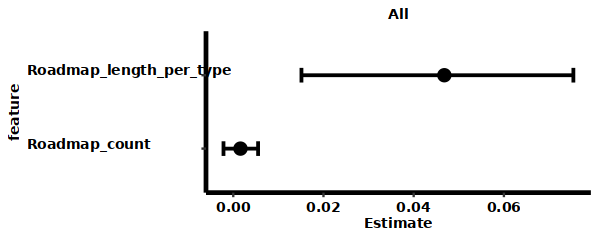

In [321]:
# Create the plot
options(repr.plot.width = 5, repr.plot.height =2)
ggplot(coef, aes(x = feature, y = Estimate)) +
  geom_point(size = 3) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8)  + ggtitle(cell_type) + coord_flip() +plot_config

### Comparison against random SNPs

In [1155]:
# all egene snps
head(sign_snps,2)   # potential alternative: also select eGenes that did not pass decision tree filter

,feature_id,rsId,cell_type,snp_id,X,feature_start,feature_end,p_value,beta,sign,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,A1BG,rs5828758,Mono,19:58358468:AGT:A,1339,58345178,58353499,0.0043698082,-0.09651646,0,⋯,4,0,0,0,3,2,1,0,0,0.01563334
2,A1BG,rs11332731,Mono,19:58358721:TG:T,1338,58345178,58353499,0.0001899306,-0.12694134,0,⋯,4,0,0,0,3,2,1,0,0,0.01563334


In [1156]:
unique(sign_snps$sign)

[1] 0 1

In [1157]:
#unique(sign_snps$id)

In [1158]:
### all the snps for which there is a score
head(paper_scores_snps,2)

,SNP,rsID,MAF,L2,TSSD,d_tss,gene,snp_source,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1:100000012:G:T,rs10875231,0.235225,105.406,5,-111657,HGNC:15846,set1;set2,0,0,0,0,0
2,1:100000827:C:T,rs6678176,0.283830,115.848,5,-110842,HGNC:15846,set1;set2,0,0,0,0,0


In [1159]:
### Get as set of random snps (excluding snps that are in the eqtl / coeqtl set)

In [1160]:
paper_scores_snps_subset = paper_scores_snps[!paper_scores_snps$rsID %in% unique(sign_snps$rsId),]

In [1161]:
nrow(paper_scores_snps)

[1] 7776878

In [1162]:
nrow(paper_scores_snps_subset)

[1] 7775040

In [1163]:
paper_scores_snps_subset = data.frame(paper_scores_snps_subset)

In [1164]:
# Get 100000 random rows that are not a eGene in our data
set.seed(1)
random_rows <- paper_scores_snps_subset %>% dplyr::slice_sample(n = 100000)

In [1165]:
head(random_rows,2)

,SNP,rsID,MAF,L2,TSSD,d_tss,gene,snp_source,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,16:1881611:C:T,rs35310267,0.1529710,537.763,50,-4453,HGNC:4805,set2,NA,NA,NA,NA,NA
2,14:74934123:T:C,rs10483859,0.0208511,42.208,18,-26336,HGNC:19857,set1;set2,0,0,0,0,0


In [1166]:
## Merge the gene-score features to the random snps

In [1167]:
random_rows = merge(random_rows, paper_scores, by.x = 'gene', by.y = 'hgnc_id')

In [1168]:
nrow(random_rows)

[1] 100022

In [1169]:
head(random_rows,2)

,gene,SNP,rsID,MAF,L2,TSSD.x,d_tss,snp_source,FANTOM_promoter,FANTOM_enhancer,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,HGNC:100,12:50455077:A:C,rs627887,0.012857,199.841,21,3746,set1;set2,0,0,⋯,3,3,2,1,4,2,1,0,1,0.0590287872
2,HGNC:10000,1:163021332:G:A,rs61812263,0.020241,30.005,7,-17233,set1;set2,0,0,⋯,7,6,3,1,6,3,1,0,0,0.0002766661


In [1170]:
random_rows$sign = 0

In [1171]:
### Prediction data for snps with coeqlt effect

In [1172]:
# concat the random snps and all the snps showing a coeqtl effect

In [1173]:
prediction_data = rbind(data.frame(sign_snps[sign_snps$sign == 1, c('sign','MAF',  'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length', 'Roadmap_length_per_type', 'Roadmap_count')], type = 1),
                        data.frame(random_rows[, c('sign', 'MAF', 'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length', 'Roadmap_length_per_type', 'Roadmap_count')], type = 0))

In [1174]:
head(prediction_data,2)

,sign,MAF,L2,TSSD.x,d_tss,length,CDS_length,Roadmap_length_per_type,Roadmap_count,type
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
21,1,0.488545,119.528,5,-26576,54.263,2.220,5.779592,98,1
36,1,NA,NA,NA,NA,558.761,1.089,3.634862,109,1


In [1175]:
### Train the GLM model

In [1176]:
model_char = glm(data = prediction_data, type ~ MAF +  L2 + TSSD.x + d_tss + length  + CDS_length +Roadmap_length_per_type +Roadmap_count , family  = 'binomial')

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [1177]:
lm_summary = summary(model_char )

In [1178]:
lm_summary


Call:
glm(formula = type ~ MAF + L2 + TSSD.x + d_tss + length + CDS_length + 
    Roadmap_length_per_type + Roadmap_count, family = "binomial", 
    data = prediction_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5160  -0.0306  -0.0165  -0.0108   4.2864  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.096e+01  6.153e-01 -17.818  < 2e-16 ***
MAF                      7.886e+00  1.083e+00   7.284 3.24e-13 ***
L2                       5.944e-04  3.846e-04   1.545  0.12225    
TSSD.x                   6.724e-02  9.758e-03   6.891 5.53e-12 ***
d_tss                    5.131e-07  6.218e-07   0.825  0.40928    
length                   1.182e-03  4.371e-04   2.704  0.00686 ** 
CDS_length              -2.247e-01  1.192e-01  -1.885  0.05947 .  
Roadmap_length_per_type  5.749e-02  4.757e-02   1.209  0.22680    
Roadmap_count            6.952e-03  5.197e-03   1.338  0.18097    
---
Signif. codes:  0 '***'

In [1179]:
### Extract the confidence intervall for features of interest

In [1180]:
confidence_int =confint(model_char)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

In [1181]:
confidence_int[c('Roadmap_length_per_type', 'Roadmap_count'),]
#confidence_int[c('Roadmap_length_per_type', 'Roadmap_count', 'd_tss'),]

,2.5 %,97.5 %
Roadmap_length_per_type,-0.050957921,0.1375618
Roadmap_count,-0.002842678,0.0176311


In [1182]:
coef = lm_summary$coefficients[c('Roadmap_length_per_type', 'Roadmap_count'),]
#coef = lm_summary$coefficients[c('Roadmap_length_per_type', 'Roadmap_count', 'd_tss'),]

In [1183]:
coef = as.data.frame(coef)

In [1184]:
coef$feature = rownames(coef)

In [1185]:
coef_coeqtl = cbind(coef, confidence_int[c('Roadmap_length_per_type', 'Roadmap_count'),])
#coef_coeqtl = cbind(coef, confidence_int[c('Roadmap_length_per_type', 'Roadmap_count', 'd_tss'),])

In [1186]:
coef_coeqtl 

,Estimate,Std. Error,z value,Pr(>|z|),feature,2.5 %,97.5 %
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Roadmap_length_per_type,0.057489728,0.047565715,1.208638,0.2268020,Roadmap_length_per_type,-0.050957921,0.1375618
Roadmap_count,0.006952116,0.005196834,1.337760,0.1809747,Roadmap_count,-0.002842678,0.0176311


In [1187]:
### Prediction data for snps with eqtl but without coeqtl effect

In [1188]:
# Concat random snps and the snps with eqtl but no coeqtl effect

In [1189]:
prediction_data = rbind(data.frame(sign_snps[sign_snps$sign == 0, c('sign', 'MAF', 'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length', 'Roadmap_length_per_type', 'Roadmap_count')], type = 1),
                        data.frame(random_rows[, c('sign','MAF',  'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length', 'Roadmap_length_per_type', 'Roadmap_count')], type = 0))

In [1190]:
head(prediction_data,2)

,sign,MAF,L2,TSSD.x,d_tss,length,CDS_length,Roadmap_length_per_type,Roadmap_count,type
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0,NA,NA,NA,NA,8.314,1.488,1.56875,96,1
2,0,NA,NA,NA,NA,8.314,1.488,1.56875,96,1


In [1191]:
## Train ligistic regression model

In [1192]:
model_char = glm(data = prediction_data, type ~ MAF +  L2 + TSSD.x + d_tss + length  + CDS_length +Roadmap_length_per_type +Roadmap_count , family  = 'binomial')

In [1193]:
lm_summary = summary(model_char )

In [1194]:
lm_summary


Call:
glm(formula = type ~ MAF + L2 + TSSD.x + d_tss + length + CDS_length + 
    Roadmap_length_per_type + Roadmap_count, family = "binomial", 
    data = prediction_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6140  -0.1872  -0.1058  -0.0721   3.4962  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -6.759e+00  1.005e-01 -67.267  < 2e-16 ***
MAF                      7.238e+00  1.806e-01  40.072  < 2e-16 ***
L2                       6.979e-05  1.055e-04   0.662    0.508    
TSSD.x                   5.989e-02  1.957e-03  30.601  < 2e-16 ***
d_tss                    7.665e-08  1.243e-07   0.617    0.537    
length                  -1.218e-03  1.884e-04  -6.464 1.02e-10 ***
CDS_length              -5.309e-02  1.718e-02  -3.090    0.002 ** 
Roadmap_length_per_type -1.096e-02  1.119e-02  -0.980    0.327    
Roadmap_count            6.976e-03  9.054e-04   7.705 1.31e-14 ***
---
Signif. codes:  0 '***'

In [1195]:
nrow(prediction_data[(prediction_data$type == 1) & (!is.na(prediction_data$MAF)),])  # check excluded snps due to missing data

[1] 1830

In [1196]:
### get confidence intervals and extract parameters

In [1197]:
confidence_int =confint(model_char)

Waiting for profiling to be done...



In [1198]:
confidence_int[c('Roadmap_length_per_type', 'Roadmap_count'),]
#confidence_int[c('Roadmap_length_per_type', 'Roadmap_count', 'd_tss'),]

,2.5 %,97.5 %
Roadmap_length_per_type,-0.033452684,0.010405013
Roadmap_count,0.005213194,0.008762925


In [1199]:
coef = lm_summary$coefficients[c('Roadmap_length_per_type', 'Roadmap_count'),]
#coef = lm_summary$coefficients[c('Roadmap_length_per_type', 'Roadmap_count', 'd_tss'),]

In [1200]:
coef = as.data.frame(coef)

In [1201]:
coef$feature = rownames(coef)

In [1202]:
coef_eqtl = cbind(coef, confidence_int[c('Roadmap_length_per_type', 'Roadmap_count'),])
#coef_eqtl = cbind(coef, confidence_int[c('Roadmap_length_per_type', 'Roadmap_count', 'd_tss'),])

In [1203]:
### Combine the coefficients of both models

In [1204]:
coef_eqtl$type = 'eqtl'
coef_coeqtl$type = 'eqtl with coeqtl effect'

In [1205]:
coef = rbind(coef_eqtl, coef_coeqtl)

In [1206]:
coef$feature = rownames(coef)

In [1207]:
coef$feature_simple = str_replace(rownames(coef), 'Roadmap_length_per_type', 'Total enhancer length')
coef$feature_simple = str_replace(coef$feature_simple, 'Roadmap_count', 'Count of active')

In [1208]:
coef$feature_simple = str_replace(coef$feature_simple , '1', '')

In [1209]:
coef$feature_simple[coef$type == 'eqtl'] = str_replace(coef$feature_simple[coef$type == 'eqtl'], 'Total enhancer length', '(per tissue/ cell type)')
coef$feature_simple[coef$type == 'eqtl'] = str_replace(coef$feature_simple[coef$type == 'eqtl'], 'Count of active', 'tissue/ cell types')

In [1210]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),feature,2.5 %,97.5 %,type,feature_simple
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Roadmap_length_per_type,-0.010962369,0.011187064,-0.9799148,3.271282e-01,Roadmap_length_per_type,-0.033452684,0.010405013,eqtl,(per tissue/ cell type)
Roadmap_count,0.006976036,0.000905446,7.7045297,1.313260e-14,Roadmap_count,0.005213194,0.008762925,eqtl,tissue/ cell types
Roadmap_length_per_type1,0.057489728,0.047565715,1.2086379,2.268020e-01,Roadmap_length_per_type1,-0.050957921,0.137561761,eqtl with coeqtl effect,Total enhancer length
Roadmap_count1,0.006952116,0.005196834,1.3377599,1.809747e-01,Roadmap_count1,-0.002842678,0.017631097,eqtl with coeqtl effect,Count of active


In [1211]:
add =  coef[1,]
add$feature_simple = ''
add$Estimate = NA

In [1212]:
coef = rbind(coef, add)

In [1213]:
coef$`2.5 %`[coef$feature_simple == ''] = NA
coef$`97.5 %`[coef$feature_simple == ''] = NA

In [1214]:
coef$feature_simple = factor(coef$feature_simple, levels = c( 'tissue/ cell types', 'Count of active','', '(per tissue/ cell type)', 'Total enhancer length'))

In [1215]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),feature,2.5 %,97.5 %,type,feature_simple
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<fct>
Roadmap_length_per_type,-0.010962369,0.011187064,-0.9799148,3.271282e-01,Roadmap_length_per_type,-0.033452684,0.010405013,eqtl,(per tissue/ cell type)
Roadmap_count,0.006976036,0.000905446,7.7045297,1.313260e-14,Roadmap_count,0.005213194,0.008762925,eqtl,tissue/ cell types
Roadmap_length_per_type1,0.057489728,0.047565715,1.2086379,2.268020e-01,Roadmap_length_per_type1,-0.050957921,0.137561761,eqtl with coeqtl effect,Total enhancer length
Roadmap_count1,0.006952116,0.005196834,1.3377599,1.809747e-01,Roadmap_count1,-0.002842678,0.017631097,eqtl with coeqtl effect,Count of active
Roadmap_length_per_type2,NA,0.011187064,-0.9799148,3.271282e-01,Roadmap_length_per_type,NA,NA,eqtl,


In [1216]:
# Create the plot comparing both
options(repr.plot.width = 10, repr.plot.height =2)
roadmap_plot = ggplot(coef, aes(x = feature_simple, y = Estimate, col = type)) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.5)  + ggtitle(paste0( cell_type)) + coeqtl_col2 + coord_flip() +plot_config +  geom_hline(yintercept = 0, color = "grey", linetype = "dashed", size = 1) + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient')

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


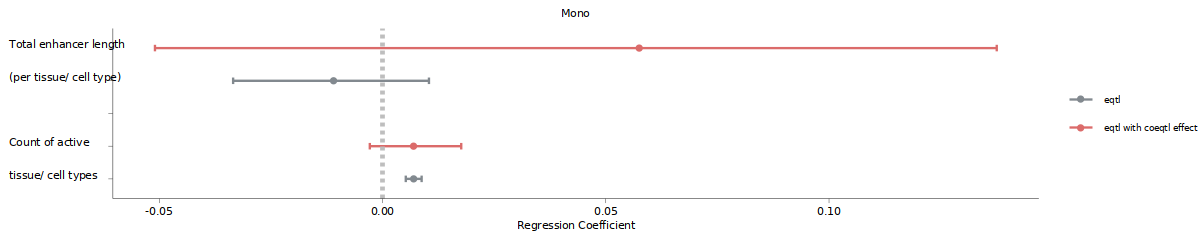

In [1217]:
roadmap_plot

In [1218]:
### Save as pdf

In [1219]:
pdf(paste0('figures/I1/I1_Roadmap_Models_', cell_type, '.pdf'), width =4.5, height = 1.5)
roadmap_plot
dev.off()

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_point()`)."


pdf 
  2

In [1220]:
### Save data for plot

In [1221]:
coef = coef[!is.na(coef$Estimate),]

In [1222]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),feature,2.5 %,97.5 %,type,feature_simple
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<fct>
Roadmap_length_per_type,-0.010962369,0.011187064,-0.9799148,3.271282e-01,Roadmap_length_per_type,-0.033452684,0.010405013,eqtl,(per tissue/ cell type)
Roadmap_count,0.006976036,0.000905446,7.7045297,1.313260e-14,Roadmap_count,0.005213194,0.008762925,eqtl,tissue/ cell types
Roadmap_length_per_type1,0.057489728,0.047565715,1.2086379,2.268020e-01,Roadmap_length_per_type1,-0.050957921,0.137561761,eqtl with coeqtl effect,Total enhancer length
Roadmap_count1,0.006952116,0.005196834,1.3377599,1.809747e-01,Roadmap_count1,-0.002842678,0.017631097,eqtl with coeqtl effect,Count of active


In [1223]:
write.csv(coef, paste0('figures/I1/I1_Roadmap_Models_', cell_type, '_data.csv'))

In [1224]:
cell_type

[1] "Mono"

### Plots comparing the features

In [1696]:
## Enhancer length

In [1697]:
options(repr.plot.width = 5, repr.plot.height = 5)
enhancer_length_plot =  ggplot(unique(egene_data[,c('eGene', 'sign', 'Roadmap_length_per_type')]), aes(x=as.character(sign), y=Roadmap_length_per_type)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + ggtitle(cell_type) + xlab('is_coeqtl') #+ ylim(0,10)

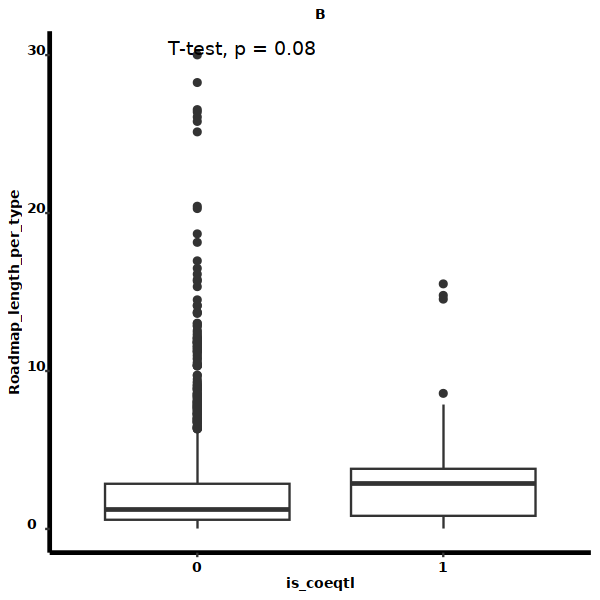

In [1698]:
enhancer_length_plot

In [1699]:
## Save the plot
pdf(paste0('figures/I1/I1_Roadmap_Enhancer_Length_', cell_type, '.pdf'), width =3, height = 3)
enhancer_length_plot
dev.off()

pdf 
  2

In [1700]:
options(repr.plot.width = 5, repr.plot.height = 5)
active_tissues_plot = ggplot(unique(egene_data[,c('eGene', 'sign', 'Roadmap_count')]), aes(x=as.character(sign), y=Roadmap_count)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + xlab('is_coeqtl') + ggtitle(cell_type)#+ ylim(0,10)

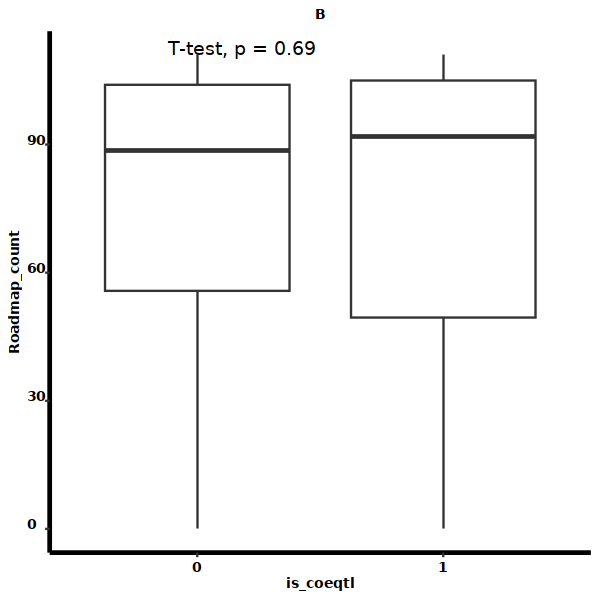

In [1701]:
active_tissues_plot

In [1702]:
## Save the plot
pdf(paste0('figures/I1/I1_Roadmap_Active_Tissues_', cell_type, '.pdf'), width =3, height = 3)
active_tissues_plot
dev.off()

pdf 
  2

In [1703]:
cell_type

[1] "B"

## Nasser data

### Evaluate with linear model (coeqtl vs. no coeqtl)

In [354]:
## Var 1: coeqtl vs. no coeqtl (without random snps)

In [355]:
colnames(sign_snps)

[1] "feature_id"              "rsId"                   
 [3] "snp_id"                  "feature_start"          
 [5] "feature_end"             "sign"                   
 [7] "snp_pos"                 "chr"                    
 [9] "pos"                     "SNP"                    
[11] "MAF"                     "L2"                     
[13] "TSSD.x"                  "d_tss"                  
[15] "gene"                    "snp_source"             
[17] "FANTOM_promoter"         "FANTOM_enhancer"        
[19] "ENCODE_PLS"              "ENCODE_pELS"            
[21] "ENCODE_dELS"             "distance_gene"          
[23] "hgnc_id"                 "GeneSymbol"             
[25] "TSSD.y"                  "length"                 
[27] "CDS_length"              "pLI"                    
[29] "LOEUF"                   "ABC_count"              
[31] "ABC_length_per_type"     "Roadmap_count"          
[33] "Roadmap_length_per_type" "promoter_count"         
[35] "connect_decile"          "connect_quantile"       
[37] "connectedness"           "PPI_degree_decile"      
[39] "PPI_degree_quantile"     "PPI_degree_cat"         
[41] "TF"                      "HI"                     
[43] "hs"

In [356]:
## Prediction Model

In [357]:
#covariates in the regression: 
#MAF, 
#LD score, 

#gene density,    = TSSD
#total gene length, = length
#total length of gene coding sequence = CDS_length

#absolute distance to nearest TSS, 
#as well as dummy variables for 20 quantiles of MAF, LD score, gene density and absolute distance to the nearest TSS

In [358]:
# as.numeric(egene_data$sign)

In [359]:
sign_snps$sign = as.numeric(sign_snps$sign)

In [360]:
model_char = glm(data = sign_snps, sign ~ MAF + L2 + TSSD.x + d_tss + length  + CDS_length +ABC_length_per_type +ABC_count , family  = 'binomial')

In [361]:
lm_summary = summary(model_char )

In [362]:
lm_summary


Call:
glm(formula = sign ~ MAF + L2 + TSSD.x + d_tss + length + CDS_length + 
    ABC_length_per_type + ABC_count, family = "binomial", data = sign_snps)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1247  -0.2638  -0.2356  -0.2211   2.8462  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.171e+00  3.186e-01  -9.955  < 2e-16 ***
MAF                  3.644e-01  5.577e-01   0.654  0.51343    
L2                   7.269e-04  2.502e-04   2.905  0.00367 ** 
TSSD.x               7.772e-04  5.356e-03   0.145  0.88462    
d_tss               -5.654e-08  5.461e-07  -0.104  0.91754    
length               1.137e-03  2.552e-04   4.457 8.30e-06 ***
CDS_length          -3.893e-02  3.074e-02  -1.266  0.20541    
ABC_length_per_type  1.429e-01  4.969e-02   2.875  0.00404 ** 
ABC_count           -8.340e-03  1.438e-03  -5.800 6.64e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parame

In [363]:
confidence_int =confint(model_char)

Waiting for profiling to be done...



In [364]:
confidence_int[c('ABC_length_per_type', 'ABC_count'),]

,2.5 %,97.5 %
ABC_length_per_type,0.04437175,0.239313292
ABC_count,-0.01112191,-0.005481338


In [365]:
coef = lm_summary$coefficients[c('ABC_length_per_type', 'ABC_count'),]

In [366]:
coef = as.data.frame(coef)

In [367]:
coef$feature = rownames(coef)

In [368]:
coef = cbind(coef, confidence_int[c('ABC_length_per_type', 'ABC_count'),])

In [369]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),feature,2.5 %,97.5 %
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
ABC_length_per_type,0.142865622,0.049685779,2.875383,4.035382e-03,ABC_length_per_type,0.04437175,0.239313292
ABC_count,-0.008340279,0.001438052,-5.799707,6.643071e-09,ABC_count,-0.01112191,-0.005481338


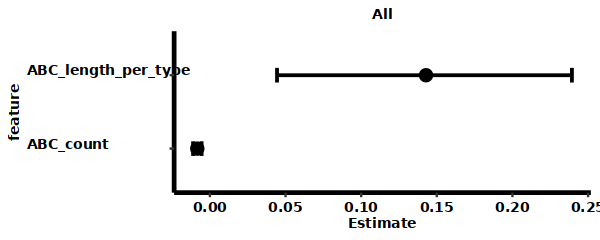

In [370]:
# Create the plot
options(repr.plot.width = 5, repr.plot.height =2)
ggplot(coef, aes(x = feature, y = Estimate)) +
  geom_point(size = 3) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8)  + ggtitle(cell_type) + coord_flip() +plot_config

### Comparison against random SNPs

In [1704]:
# all egene snps
head(sign_snps,2)   # potential alternative: also select eGenes that did not pass decision tree filter

,feature_id,rsId,cell_type,snp_id,X,feature_start,feature_end,p_value,beta,sign,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,A1BG,rs10406593,B,19:58406208:G:A,1347,58345178,58353499,4.333125e-07,-0.1954896,0,⋯,4,0,0,0,3,2,1,0,0,0.0156333377
2,AAMDC,rs6592753,B,11:77965973:A:G,536,77821109,77918432,2.793657e-04,-0.1531307,0,⋯,3,0,0,0,2,1,1,0,0,0.0002349612


In [1705]:
unique(sign_snps$sign)

[1] 0 1

In [1706]:
#unique(sign_snps$id)

In [1707]:
### all the snps for which there is a score
head(paper_scores_snps,2)

,SNP,rsID,MAF,L2,TSSD,d_tss,gene,snp_source,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1:100000012:G:T,rs10875231,0.235225,105.406,5,-111657,HGNC:15846,set1;set2,0,0,0,0,0
2,1:100000827:C:T,rs6678176,0.283830,115.848,5,-110842,HGNC:15846,set1;set2,0,0,0,0,0


In [1708]:
### Get as set of random snps (that are not among the eqtl/ coeqtl snps)

In [1709]:
paper_scores_snps_subset = paper_scores_snps[!paper_scores_snps$rsID %in% unique(sign_snps$rsId),]

In [1710]:
nrow(paper_scores_snps)

[1] 7776878

In [1711]:
nrow(paper_scores_snps_subset)

[1] 7774816

In [1712]:
paper_scores_snps_subset = data.frame(paper_scores_snps_subset)

In [1713]:
# Get 100000 random rows that are not a eGene in our data
set.seed(1)
random_rows <- paper_scores_snps_subset %>% dplyr::slice_sample(n = 100000)

In [1714]:
head(random_rows,2)

,SNP,rsID,MAF,L2,TSSD,d_tss,gene,snp_source,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,16:18839496:G:C,rs12448649,0.391784,163.068,8,-26602,HGNC:697,set2,NA,NA,NA,NA,NA
2,14:74985544:G:A,rs4899518,0.231698,69.704,19,-24664,HGNC:14537,set1;set2,0,0,0,0,0


In [1715]:
## Merge the gene-score features to the random snps

In [1716]:
random_rows = merge(random_rows, paper_scores, by.x = 'gene', by.y = 'hgnc_id')

In [1717]:
nrow(random_rows)

[1] 100031

In [1718]:
head(random_rows,2)

,gene,SNP,rsID,MAF,L2,TSSD.x,d_tss,snp_source,FANTOM_promoter,FANTOM_enhancer,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,HGNC:100,12:50441751:A:T,rs17124367,0.0690880,46.878,21,-9580,set1;set2,0,0,⋯,3,3,2,1,4,2,1,0,1,0.0590287872
2,HGNC:10000,1:163091794:A:G,rs10917679,0.0755104,83.675,6,53229,set1;set2,0,0,⋯,7,6,3,1,6,3,1,0,0,0.0002766661


In [1719]:
random_rows$sign = 0

In [1720]:
### Prediction model for snps with coeqtl effect vs. random snps

In [1721]:
# Set up prediction data: concat snps with coeqtl effect and random snps

In [1722]:
prediction_data = rbind(data.frame(sign_snps[sign_snps$sign == 1, c('sign', 'MAF', 'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length', 'ABC_length_per_type', 'ABC_count')], type = 1),
                        data.frame(random_rows[, c('sign', 'MAF', 'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length',  'ABC_length_per_type', 'ABC_count')], type = 0))

In [1723]:
head(prediction_data,2)

,sign,MAF,L2,TSSD.x,d_tss,length,CDS_length,ABC_length_per_type,ABC_count,type
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
57,1,0.416250,346.629,3,15048,368.787,8.454,2.975969,128,1
59,1,0.482531,327.858,4,-1141,368.787,8.454,2.975969,128,1


In [1724]:
## Specify GLM model

In [1725]:
model_char = glm(data = prediction_data, type ~ MAF + L2 + TSSD.x + d_tss + length  + CDS_length + ABC_length_per_type +ABC_count , family  = 'binomial')

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [1726]:
lm_summary = summary(model_char )

In [1727]:
lm_summary


Call:
glm(formula = type ~ MAF + L2 + TSSD.x + d_tss + length + CDS_length + 
    ABC_length_per_type + ABC_count, family = "binomial", data = prediction_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.3973  -0.0236  -0.0130  -0.0084   4.2109  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.022e+01  7.762e-01 -13.170  < 2e-16 ***
MAF                  7.598e+00  1.295e+00   5.865 4.48e-09 ***
L2                   4.640e-04  3.853e-04   1.204   0.2284    
TSSD.x               6.720e-02  1.129e-02   5.952 2.64e-09 ***
d_tss               -7.003e-07  7.807e-07  -0.897   0.3697    
length               9.056e-04  6.676e-04   1.356   0.1750    
CDS_length          -2.432e-01  1.591e-01  -1.529   0.1263    
ABC_length_per_type -4.262e-01  2.038e-01  -2.091   0.0365 *  
ABC_count            7.287e-03  3.996e-03   1.824   0.0682 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion 

In [1728]:
confidence_int =confint(model_char)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted proba

In [1729]:
confidence_int[c('ABC_length_per_type', 'ABC_count'),]

,2.5 %,97.5 %
ABC_length_per_type,-0.8470815840,-0.04710767
ABC_count,-0.0003091497,0.01547428


In [1730]:
coef = lm_summary$coefficients[c('ABC_length_per_type', 'ABC_count'),]

In [1731]:
coef = as.data.frame(coef)

In [1732]:
coef$feature = rownames(coef)

In [1733]:
coef_coeqtl = cbind(coef, confidence_int[c('ABC_length_per_type', 'ABC_count'),])

In [1734]:
### Prediction Model for snps with eqtl effect but no coeqtl effect

In [1735]:
# concat random snps with snps having eqtl effect but no coeqtl effect

In [1736]:
prediction_data = rbind(data.frame(sign_snps[sign_snps$sign == 0, c('sign','MAF',  'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length', 'ABC_length_per_type', 'ABC_count')], type = 1),
                        data.frame(random_rows[, c('sign', 'MAF',  'L2', 'TSSD.x', 'd_tss', 'length', 'CDS_length', 'ABC_length_per_type', 'ABC_count')], type = 0))

In [1737]:
head(prediction_data,2)

,sign,MAF,L2,TSSD.x,d_tss,length,CDS_length,ABC_length_per_type,ABC_count,type
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,0,0.264693,111.842,30,4704,8.314,1.488,2.166286,7,1
2,0,0.283015,192.682,14,28698,97.323,0.507,1.300638,116,1


In [1738]:
model_char = glm(data = prediction_data, type ~ MAF + L2 + TSSD.x + d_tss + length  + CDS_length +ABC_length_per_type + ABC_count , family  = 'binomial')

In [1739]:
lm_summary = summary(model_char )

In [1740]:
lm_summary


Call:
glm(formula = type ~ MAF + L2 + TSSD.x + d_tss + length + CDS_length + 
    ABC_length_per_type + ABC_count, family = "binomial", data = prediction_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8561  -0.1764  -0.1017  -0.0565   4.4013  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -7.884e+00  1.305e-01 -60.421  < 2e-16 ***
MAF                  7.453e+00  1.745e-01  42.721  < 2e-16 ***
L2                   1.335e-04  1.093e-04   1.221   0.2219    
TSSD.x               6.246e-02  2.023e-03  30.873  < 2e-16 ***
d_tss                9.859e-08  1.172e-07   0.841   0.4001    
length              -4.698e-04  1.662e-04  -2.827   0.0047 ** 
CDS_length          -3.722e-02  1.579e-02  -2.358   0.0184 *  
ABC_length_per_type -1.786e-01  2.850e-02  -6.267 3.69e-10 ***
ABC_count            2.078e-02  7.426e-04  27.986  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion 

In [1741]:
confidence_int =confint(model_char)

Waiting for profiling to be done...



In [1742]:
confidence_int[c('ABC_length_per_type', 'ABC_count'),]

,2.5 %,97.5 %
ABC_length_per_type,-0.23487503,-0.12314079
ABC_count,0.01934471,0.02225618


In [1743]:
coef = lm_summary$coefficients[c('ABC_length_per_type', 'ABC_count'),]

In [1744]:
coef = as.data.frame(coef)

In [1745]:
coef$feature = rownames(coef)

In [1746]:
coef_eqtl = cbind(coef, confidence_int[c('ABC_length_per_type', 'ABC_count'),])

In [1747]:
### Combine coefficients from both models

In [1748]:
coef_eqtl$type = 'eqtl'
coef_coeqtl$type = 'eqtl with coeqtl effect'

In [1749]:
coef = rbind(coef_eqtl, coef_coeqtl)

In [1750]:
coef$feature = paste0(coef$feature, ' (', coef$type, ')')

In [1751]:
coef

,Estimate,Std. Error,z value,Pr(>|z|),feature,2.5 %,97.5 %,type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
ABC_length_per_type,-0.178622810,0.0285035991,-6.266676,3.688373e-10,ABC_length_per_type (eqtl),-0.2348750256,-0.12314079,eqtl
ABC_count,0.020781576,0.0007425587,27.986441,2.376011e-172,ABC_count (eqtl),0.0193447101,0.02225618,eqtl
ABC_length_per_type1,-0.426189573,0.2038040693,-2.091173,3.651256e-02,ABC_length_per_type (eqtl with coeqtl effect),-0.8470815840,-0.04710767,eqtl with coeqtl effect
ABC_count1,0.007287192,0.0039955043,1.823848,6.817508e-02,ABC_count (eqtl with coeqtl effect),-0.0003091497,0.01547428,eqtl with coeqtl effect


In [1752]:
# Create the plot comparing both
options(repr.plot.width = 10, repr.plot.height =2)
nasser_plot = ggplot(coef, aes(x = feature, y = Estimate, col = type)) +
  geom_point(size = 3) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8)  + ggtitle(paste0( cell_type)) + coord_flip() +plot_config +  geom_hline(yintercept = 0, color = "grey", linetype = "dashed", size = 1)

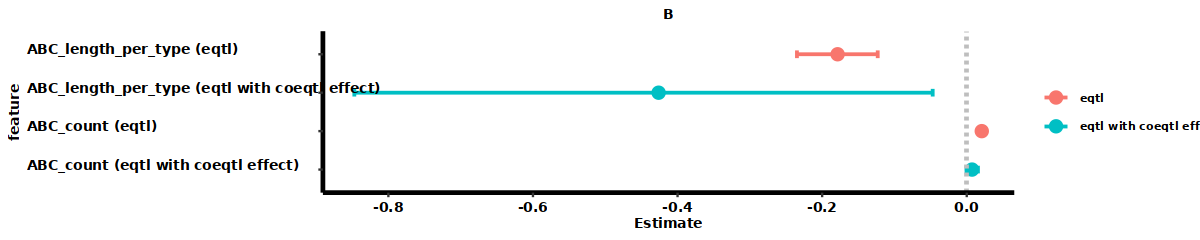

In [1753]:
nasser_plot

In [1754]:
pdf(paste0('figures/I1/I1_Nasser_Models_', cell_type, '.pdf'), width =7, height = 2)
nasser_plot
dev.off()

pdf 
  2

###  Plots comparing features

In [1755]:
### Count of active tissues

In [1756]:
options(repr.plot.width = 5, repr.plot.height = 5)
nasser_active_tissues = ggplot(unique(egene_data[,c('eGene', 'sign', 'ABC_count')]), aes(x=as.character(sign), y=ABC_count)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + xlab('is_coeqtl') + ggtitle(cell_type)

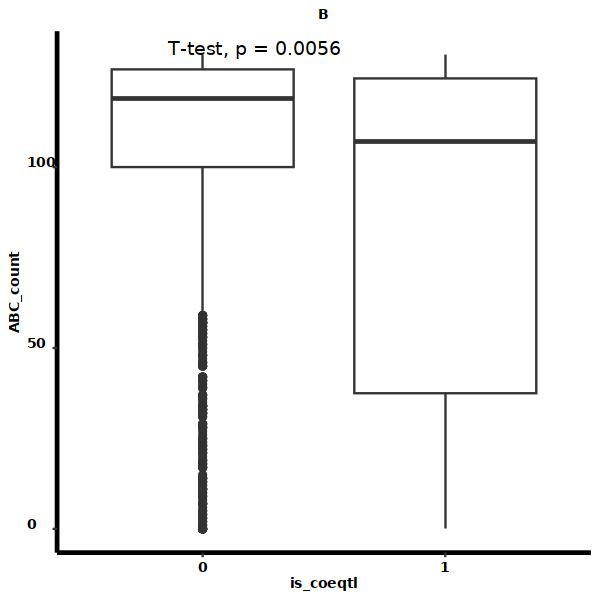

In [1757]:
nasser_active_tissues

In [1758]:
## Save the plot
pdf(paste0('figures/I1/I1_Nasser_Active_Tissues_', cell_type, '.pdf'), width =3, height = 3)
nasser_active_tissues
dev.off()

pdf 
  2

In [1759]:
### mean length of ABC enhancers across active biosamples, processed using data from Nasser et al., Nature 2021

In [1760]:
options(repr.plot.width = 5, repr.plot.height = 5)
nasser_enhancer_length = ggplot(unique(egene_data[,c('eGene', 'sign', 'ABC_length_per_type')]), aes(x=as.character(sign), y=ABC_length_per_type)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test") + xlab('is_coeqtl') + ggtitle(cell_type)

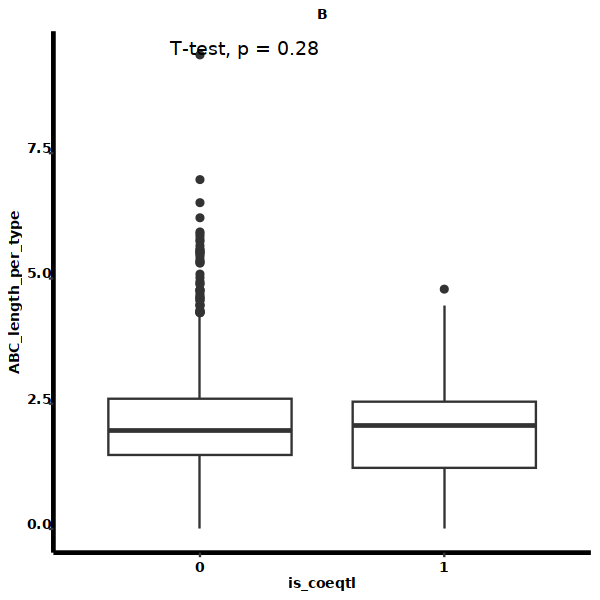

In [1761]:
nasser_enhancer_length

In [1762]:
## Save the plot
pdf(paste0('figures/I1/I1_Nasser_Enhancer_Length_', cell_type, '.pdf'), width =3, height = 3)
nasser_enhancer_length
dev.off()

pdf 
  2

## Go Counts

In [3361]:
### Go count feature on eGene Level

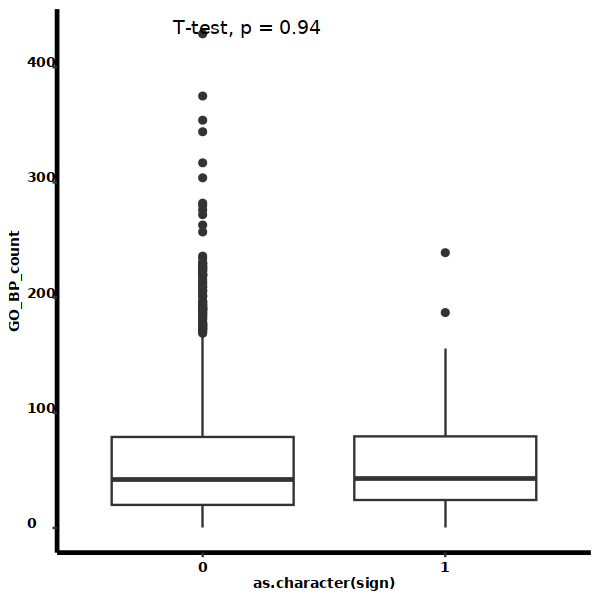

In [3362]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=as.character(sign), y=GO_BP_count)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")# + ylim(0,25)

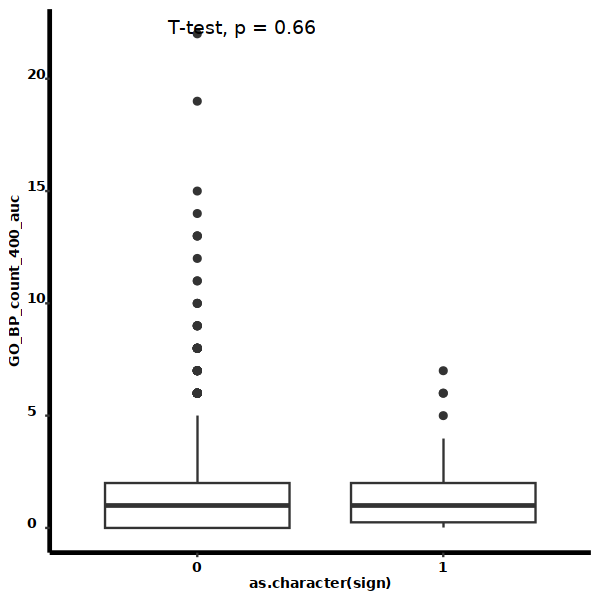

In [3363]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=as.character(sign), y=GO_BP_count_400_auc)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")# + ylim(0,25)

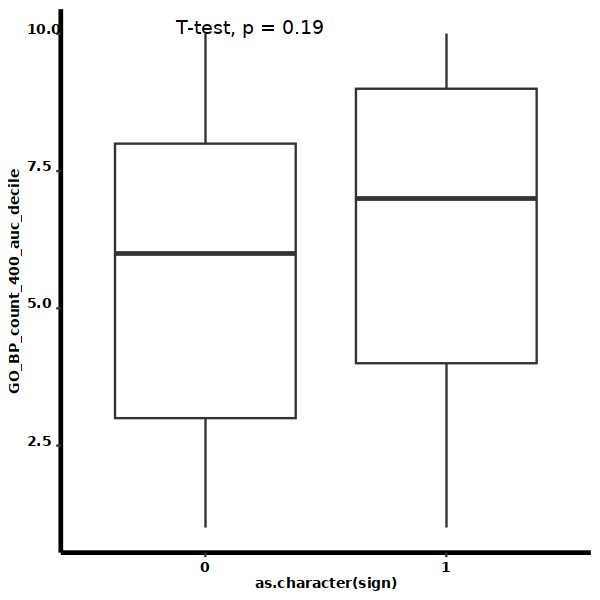

In [3364]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=as.character(sign), y=GO_BP_count_400_auc_decile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")# + ylim(0,25)

In [3365]:
### Percentage of genes per GO_BP count cat

In [3366]:
quant_eval = egene_data %>% group_by(sign, GO_BP_count_400_auc_decile) %>% summarise(amount_genes = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [3367]:
#quant_eval

In [3368]:
quant_eval = quant_eval %>% group_by(sign) %>% mutate(total_genes = sum(amount_genes))

In [3369]:
quant_eval$percentage = quant_eval$amount_genes/ quant_eval$total_genes

In [3370]:
quant_eval$sign = as.character(quant_eval$sign)

In [3371]:
#quant_eval

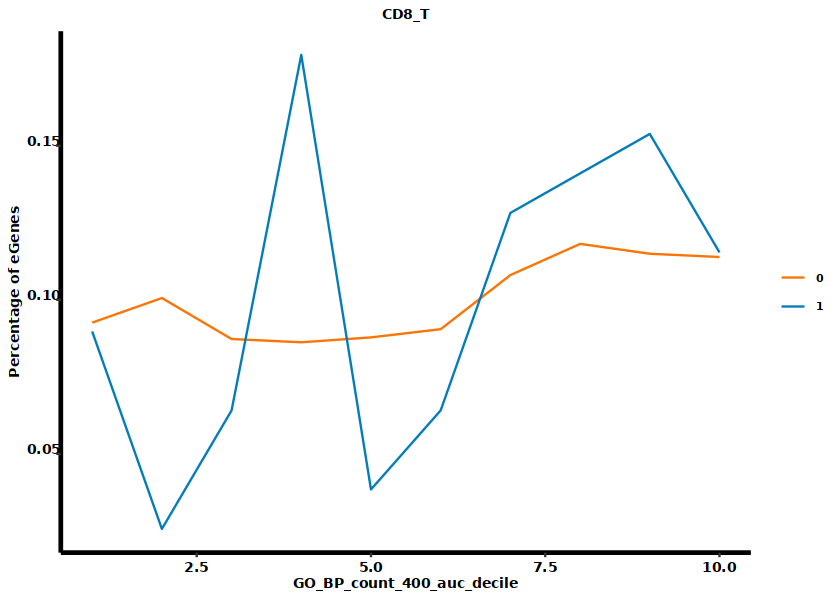

In [3372]:
options(repr.plot.width = 7, repr.plot.height = 5)
go_plot = ggplot(quant_eval, aes(x=GO_BP_count_400_auc_decile, y=percentage, color =sign)) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('GO_BP_count_400_auc_decile') + ylab('Percentage of eGenes')
go_plot

In [3373]:
### Perform an enrichment test for each quantile

In [3374]:
quant_eval$amount_neg_genes = quant_eval$total_genes - quant_eval$amount_genes

In [3375]:
quant_eval %>% arrange(-as.numeric(sign))

sign,GO_BP_count_400_auc_decile,amount_genes,total_genes,percentage,amount_neg_genes
<chr>,<int>,<int>,<int>,<dbl>,<int>
1,1,7,78,0.08974359,71
1,2,2,78,0.02564103,76
1,3,5,78,0.06410256,73
1,4,14,78,0.17948718,64
1,5,3,78,0.03846154,75
1,6,5,78,0.06410256,73
1,7,10,78,0.12820513,68
1,8,11,78,0.14102564,67
1,9,12,78,0.15384615,66


In [3376]:
contingency_table_data = data.frame()
odds_ratio_result = data.frame()

In [3377]:
for(i in unique(quant_eval$GO_BP_count_400_auc_decile)){
    quant_eval = quant_eval %>% arrange(-as.numeric(sign))
    contingency_table = quant_eval[quant_eval$GO_BP_count_400_auc_decile == i, c('amount_genes', 'amount_neg_genes', 'GO_BP_count_400_auc_decile')]
    if(nrow(contingency_table) == 2){
    contingency_table$GO_BP_count_400_auc_decile = NULL
    print(contingency_table)
    contingency_table = as.matrix (contingency_table)
    
    result = fisher.test(contingency_table)
    print(i)
    print(result)
        
    ## save the data
    contingency_table = as.data.frame(contingency_table)
    contingency_table$is_coeqtl = c(1,0)
    contingency_table$GO_BP_count_400_auc_decile =i
    contingency_table_data = rbind(contingency_table_data, contingency_table)
        
        
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1])
    or_result$GO_BP_count_400_auc_decile = i
    odds_ratio_result = rbind(odds_ratio_result, or_result)
        }}

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1            7               71
2          174             1705
[1] 1

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 1
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.369069 2.140927
sample estimates:
odds ratio 
 0.9660989 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1            2               76
2          189             1690
[1] 2

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.02952
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.02777799 0.89302225
sample estimates:
odds ratio 
 0.2354129 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1            5               73
2          164             1715
[1] 3

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.6791


In [3378]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,GO_BP_count_400_auc_decile
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
odds ratio,1.00000000,0.9660989,2.1409266,0.36906900,1
odds ratio1,0.02952063,0.2354129,0.8930222,0.02777799,2
odds ratio2,0.67907131,0.7163624,1.7855475,0.22271725,3
odds ratio3,0.01298231,2.3170665,4.2916294,1.17313990,4
odds ratio4,0.14998223,0.4156485,1.2850631,0.08291898,5
odds ratio5,0.54497456,0.6886719,1.7153930,0.21418282,6
odds ratio6,0.57646971,1.2140071,2.4203876,0.54835600,7
odds ratio7,0.48003140,1.2252813,2.3810345,0.57491171,8
odds ratio8,0.28092457,1.3995575,2.6649472,0.67729227,9


In [3379]:
### Plot the odds ratio result

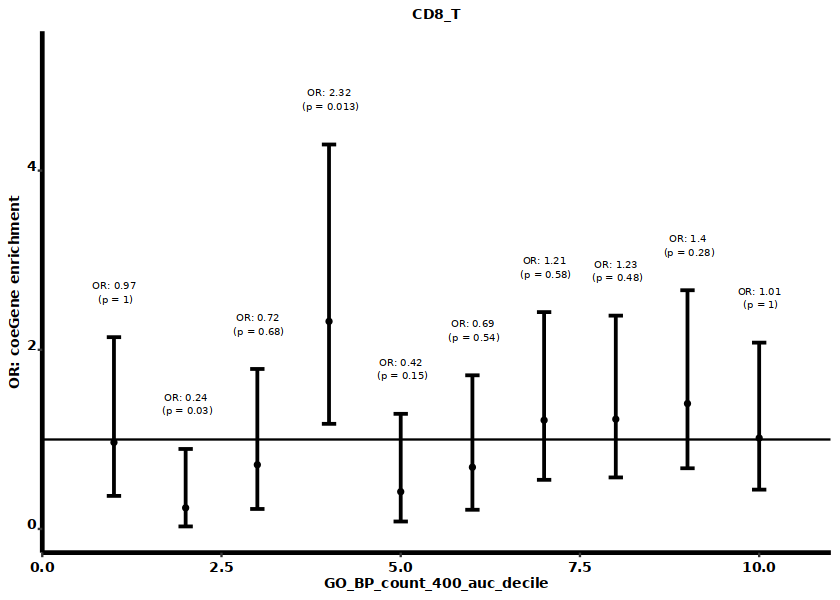

In [3380]:
options(repr.plot.width = 7, repr.plot.height = 5)
or_plot = ggplot(odds_ratio_result, aes(x = GO_BP_count_400_auc_decile, y = estimate )) +
geom_point(size = 1) + geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2)  +                           # Plot points
geom_errorbar(aes(ymin = conf_lower, 
                ymax = conf_upper), 
            width = 0.2, size = 0.8) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_result$conf_upper) + 1) + ggtitle(cell_type) + plot_config + xlab('GO_BP_count_400_auc_decile') + xlim(0.5, max(odds_ratio_result$GO_BP_count_400_auc_decile) +0.5) + ylab('OR: coeGene enrichment')# + theme(axis.title.y = element_blank(), axis.title.x = element_blank())
or_plot

In [3381]:
### Add enrichment to line plot

In [3382]:
quant_eval = merge(quant_eval, odds_ratio_result, by.x = 'GO_BP_count_400_auc_decile', by.y = 'GO_BP_count_400_auc_decile')

In [3383]:
quant_eval$label = NA
quant_eval$label[(quant_eval$p_value < 0.05) & (quant_eval$sign == 1)] ='*'
quant_eval$label[(quant_eval$p_value < 0.01) & (quant_eval$sign == 1)] ='**'
quant_eval$label[(quant_eval$p_value < 0.001) & (quant_eval$sign == 1)] ='***'

In [3384]:
#quant_eval

Warning message:
"Removed 18 rows containing missing values or values outside the scale range
(`geom_text()`)."


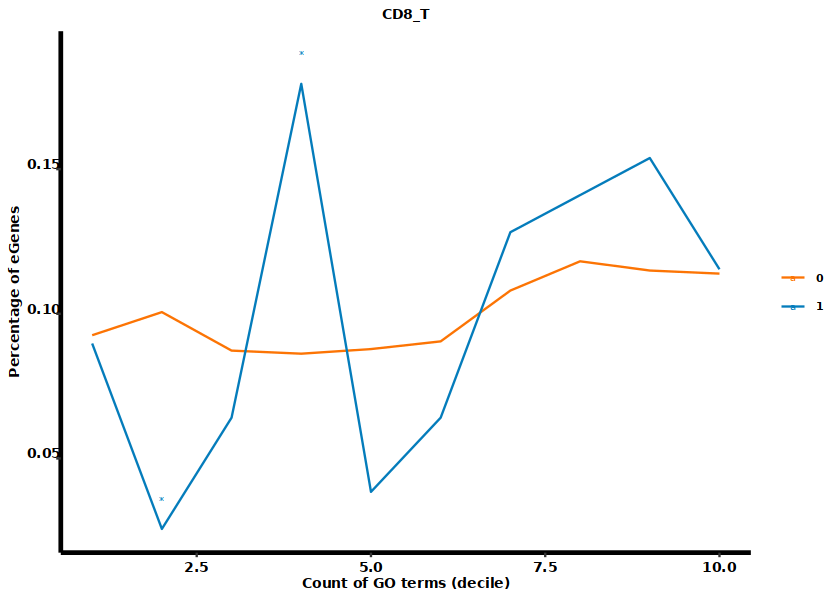

In [3385]:
options(repr.plot.width = 7, repr.plot.height = 5)
go_plot = ggplot(quant_eval, aes(x=GO_BP_count_400_auc_decile, y=percentage, color =sign)) +   geom_text(aes(label = label, y = percentage+ 0.01), size = 2) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Count of GO terms (decile)') + ylab('Percentage of eGenes')
go_plot

In [3386]:
pdf(paste0('figures/I1/I1Go_Plot_', cell_type, '.pdf'), width =3.5, height = 1.5)
go_plot
dev.off()

Warning message:
"Removed 18 rows containing missing values or values outside the scale range
(`geom_text()`)."


pdf 
  2

## GnomAD Features

In [3387]:
### pLI score from gnomAD

In [3388]:
egene_data$high_pli = 1
egene_data$high_pli[egene_data$pLI < 0.9] = 0

In [3389]:
### Calculate proportion of high PLI gene

In [3390]:
pli_prop = egene_data %>% group_by(sign, high_pli) %>% summarise(amount_cat = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [3391]:
pli_prop = pli_prop %>% dcast(sign ~ high_pli, value.var = 'amount_cat')

In [3392]:
colnames(pli_prop) = c('sign', 'low_pli', 'high_pli')

In [3393]:
pli_prop$percentage = pli_prop$high_pli/(pli_prop$low_pli + pli_prop$high_pli)

In [3394]:
pli_prop

sign,low_pli,high_pli,percentage
<chr>,<int>,<int>,<dbl>
0,1556,323,0.1718999
1,63,15,0.1923077


Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


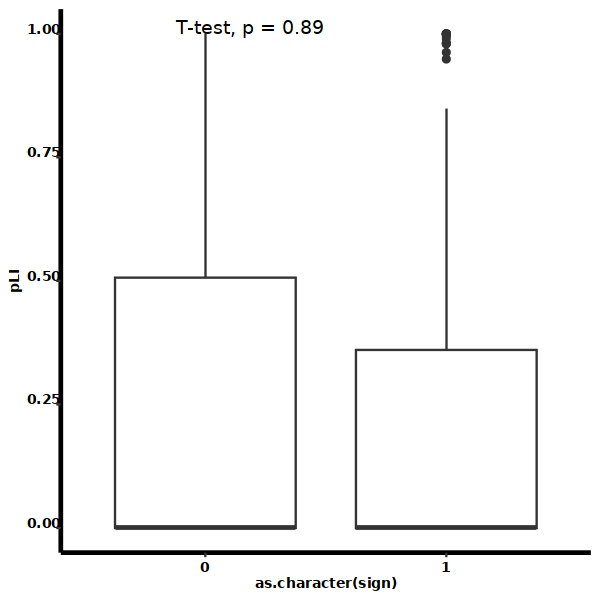

In [3395]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=as.character(sign), y=pLI)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [3396]:
### LOEUF score from gnomAD

Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


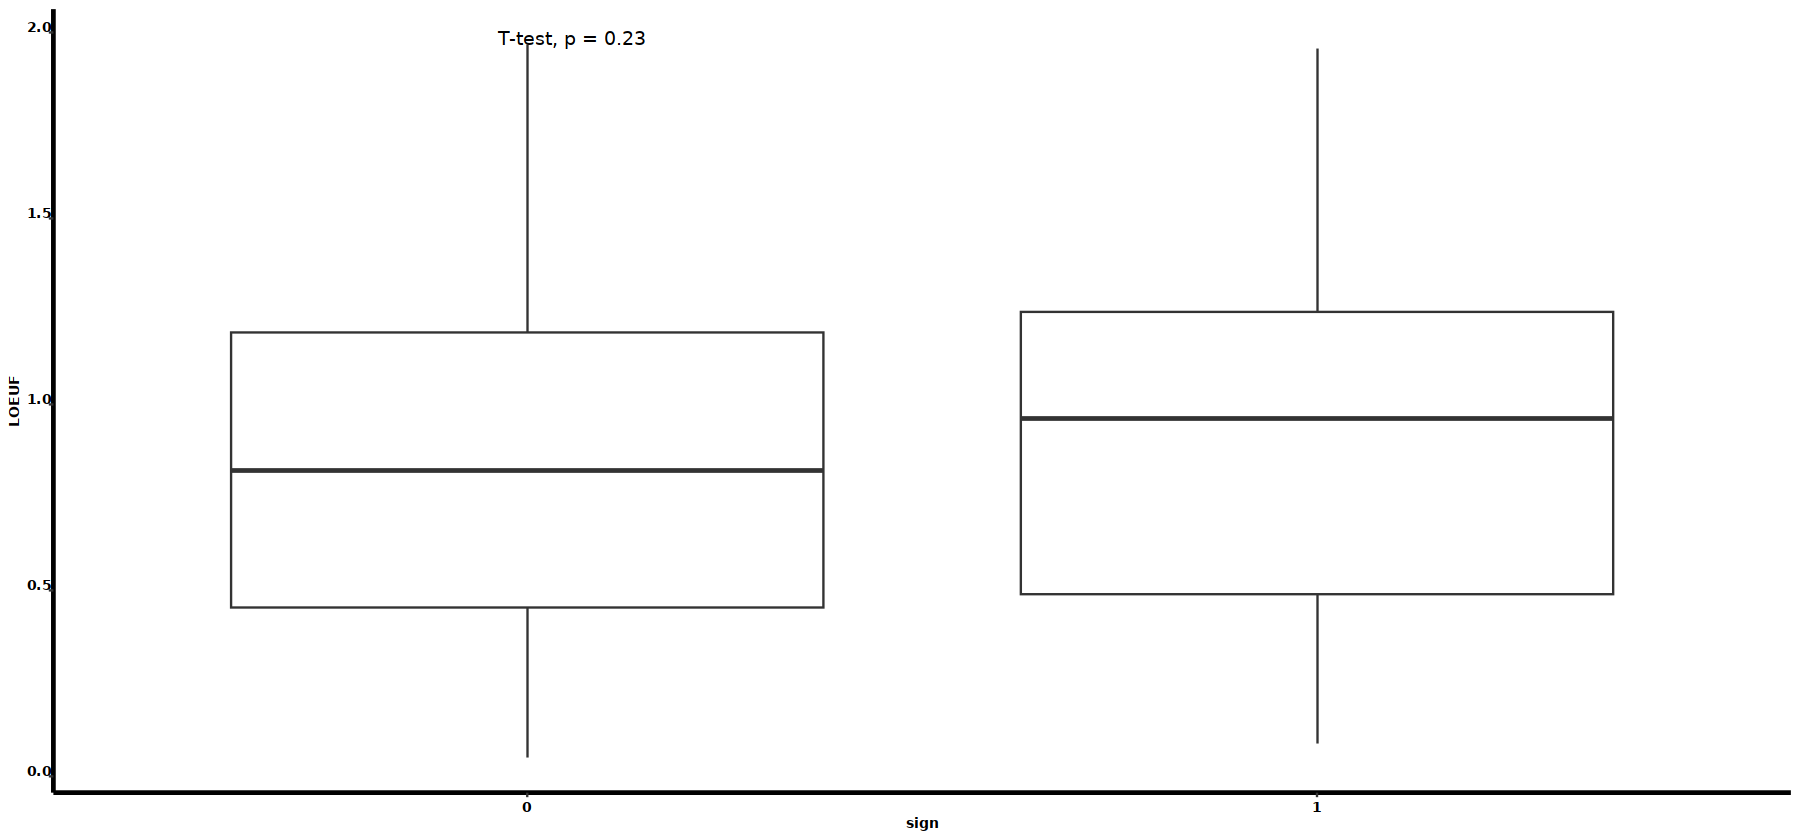

In [3397]:
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(egene_data, aes(x=sign, y=LOEUF)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [3398]:
### LOEUF score from gnomAD

Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


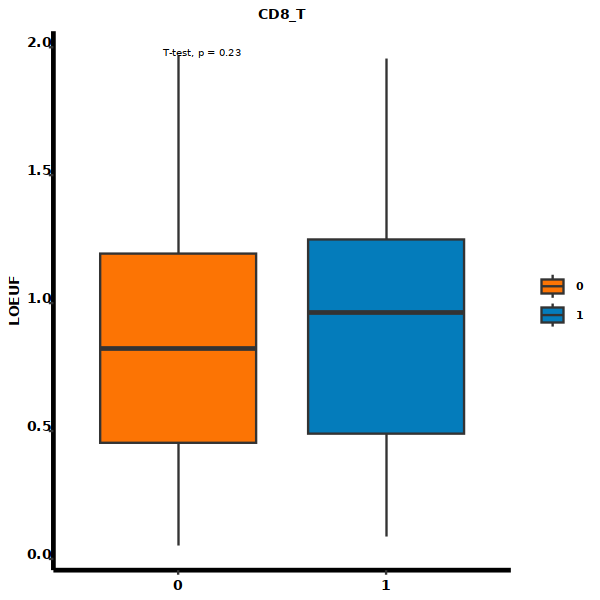

In [3399]:
options(repr.plot.width = 5, repr.plot.height = 5)
loeuf_plot = ggplot(egene_data, aes(x=as.character(sign), y=LOEUF, fill = as.character(sign))) +  coeqtl_fill + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test", size = 2) + ggtitle(cell_type) + theme(axis.title.x = element_blank())
loeuf_plot

In [3400]:
pdf(paste0('figures/I1/I1_LOEUF_Score_', cell_type, '.pdf'), width =2, height = 1.8)
loeuf_plot
dev.off()

Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 15 rows containing non-finite outside the scale range
(`stat_compare_means()`)."


pdf 
  2

## Distance to closest TSS / distance to eGene

### Distance to closest TSS

In [3143]:
head(sign_snps,2)

,feature_id,rsId,cell_type,snp_id,X,feature_start,feature_end,p_value,beta,sign,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,A1BG,rs12461352,CD8_T,19:58357814:C:A,1414,58345178,58353499,3.536696e-08,-0.1400886,0,⋯,4,0,0,0,3,2,1,0,0,0.01563334
2,A2M-AS1,rs11502446,CD8_T,12:9014787:A:T,626,9065177,9068060,7.537206e-84,0.5458339,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [434]:
## Evaluate distance to closest TSS (d_tss feature)

In [435]:
## count total amount of snps with coeqtl vs. withot coeqtl effect

In [436]:
total_amounts = sign_snps %>% group_by(sign) %>% dplyr::count()

In [437]:
total_amounts

sign,n
<dbl>,<int>
0,12369
1,441


In [438]:
## Calculate amount of snps falling int distinct binds of d_tss

In [439]:
sign_snps$d_tss = sign_snps$d_tss/ 1000

In [440]:
min(sign_snps$d_tss, na.rm = TRUE)

[1] -990.864

In [441]:
max(sign_snps$d_tss, na.rm = TRUE)

[1] 982.816

In [442]:
bins = seq(-1000,1000, by = 10)

In [443]:
sign_snps$d_tss_binned =  cut(sign_snps$d_tss, breaks = bins, include.lowest = TRUE, right = FALSE)

In [444]:
head(sign_snps,2)

,feature_id,rsId,snp_id,feature_start,feature_end,sign,snp_pos,chr,pos,SNP,⋯,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,d_tss_binned
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,A1BG,rs4801601,19:58497199:G:A,58345178,58353499,0,19:58497199,19,58497199,19:59008566:G:A,⋯,0,0,0,3,2,1,0,0,0.01563334,"[10,20)"
2,A1BG,rs10406593,19:58406208:G:A,58345178,58353499,0,19:58406208,19,58406208,19:58917575:G:A,⋯,0,0,0,3,2,1,0,0,0.01563334,"[0,10)"


In [445]:
### Calculate proportion of snps in each bin

In [446]:
proportions = sign_snps %>% group_by(sign, d_tss_binned) %>% summarise(amount_snps = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [447]:
### Calculate proportion by dividing through total number

In [448]:
proportions = merge(proportions, total_amounts)

In [449]:
proportions$percentage = proportions$amount_snps / proportions$n

In [450]:
proportions$start = str_replace(proportions$d_tss_binned, ',.*', '')

In [451]:
proportions$start = str_replace(proportions$start, '^.', '')

In [452]:
head(proportions)

,sign,d_tss_binned,amount_snps,n,percentage,start
,<dbl>,<fct>,<int>,<int>,<dbl>,<chr>
1,0,"[-970,-960)",2,12369,1.616946e-04,-970
2,0,"[-940,-930)",1,12369,8.084728e-05,-940
3,0,"[-920,-910)",1,12369,8.084728e-05,-920
4,0,"[-680,-670)",1,12369,8.084728e-05,-680
5,0,"[-630,-620)",2,12369,1.616946e-04,-630
6,0,"[-560,-550)",3,12369,2.425418e-04,-560


In [453]:
### Select the bins and proportions to visualize

In [454]:
visualization_data =rbind( data.frame(start = bins, sign = 0),
                          data.frame(start = bins, sign = 1))

In [455]:
visualization_data = merge(visualization_data, proportions, all.x = TRUE)

In [456]:
head(visualization_data,2)

,start,sign,d_tss_binned,amount_snps,n,percentage
,<dbl>,<dbl>,<fct>,<int>,<int>,<dbl>
1,-1000,0,NA,NA,NA,NA
2,-1000,1,NA,NA,NA,NA


In [457]:
visualization_data[is.na(visualization_data)] = 0

Warning message in `[<-.factor`(`*tmp*`, thisvar, value = 0):
"invalid factor level, NA generated"


In [458]:
### Make Plot

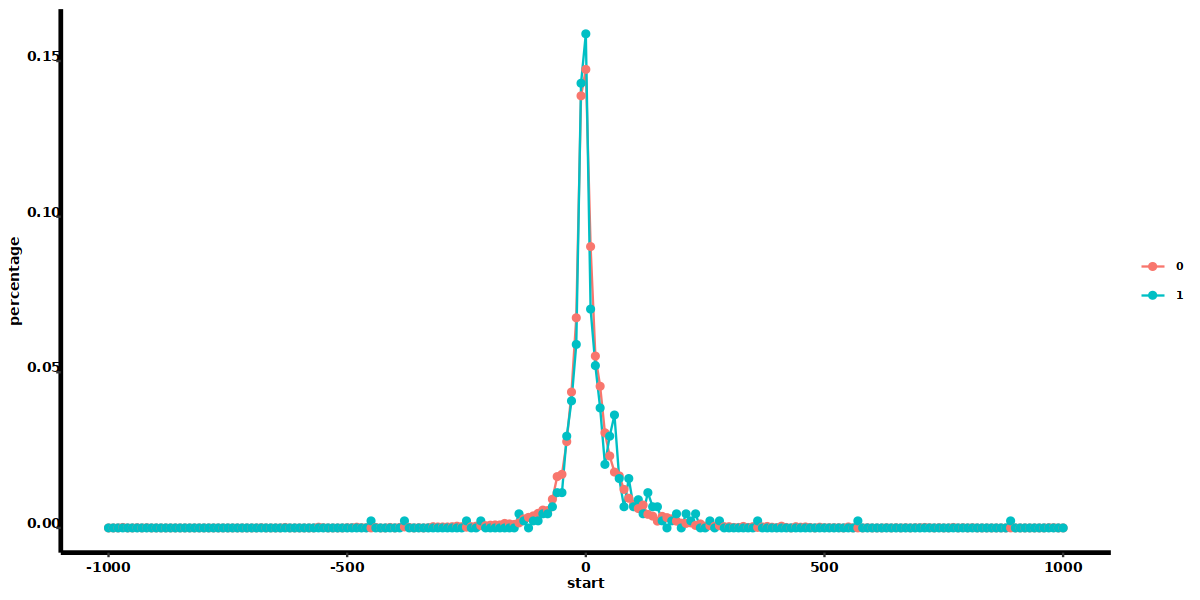

In [459]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data=visualization_data, aes(x=start, y=percentage, col=as.character(sign))) +
  geom_line()+
  geom_point() + plot_config

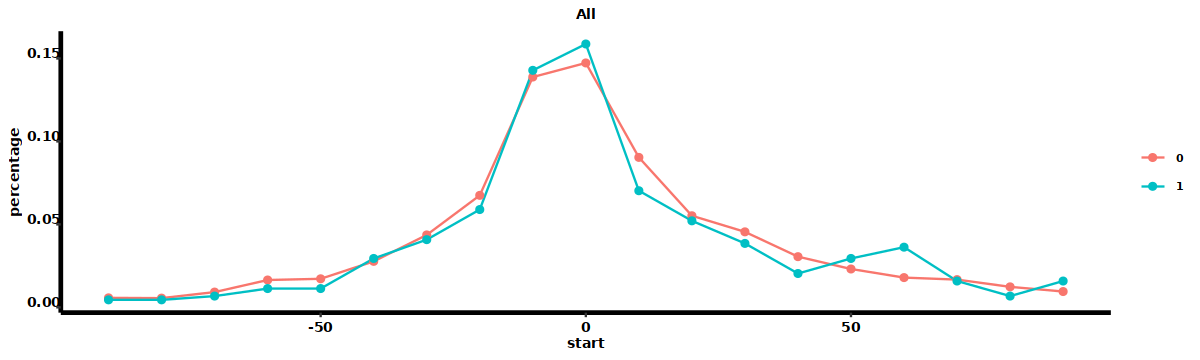

In [460]:
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(data=visualization_data[(visualization_data$start > -100) & (visualization_data$start < 100),], aes(x=start, y=percentage, col=as.character(sign))) +
  geom_line()+
  geom_point() + plot_config + ggtitle(cell_type)

### Distance to eGene

In [461]:
head(sign_snps,2)

,feature_id,rsId,snp_id,feature_start,feature_end,sign,snp_pos,chr,pos,SNP,⋯,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,d_tss_binned
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>
1,A1BG,rs4801601,19:58497199:G:A,58345178,58353499,0,19:58497199,19,58497199,19:59008566:G:A,⋯,0,0,0,3,2,1,0,0,0.01563334,"[10,20)"
2,A1BG,rs10406593,19:58406208:G:A,58345178,58353499,0,19:58406208,19,58406208,19:58917575:G:A,⋯,0,0,0,3,2,1,0,0,0.01563334,"[0,10)"


In [462]:
## Evaluate distance to closest TSS (d_tss feature)

In [463]:
## count total amount of snps with coeqtl vs. withot coeqtl effect

In [464]:
total_amounts = sign_snps %>% group_by(sign) %>% dplyr::count()

In [465]:
total_amounts

sign,n
<dbl>,<int>
0,12369
1,441


In [466]:
colnames(sign_snps)

[1] "feature_id"              "rsId"                   
 [3] "snp_id"                  "feature_start"          
 [5] "feature_end"             "sign"                   
 [7] "snp_pos"                 "chr"                    
 [9] "pos"                     "SNP"                    
[11] "MAF"                     "L2"                     
[13] "TSSD.x"                  "d_tss"                  
[15] "gene"                    "snp_source"             
[17] "FANTOM_promoter"         "FANTOM_enhancer"        
[19] "ENCODE_PLS"              "ENCODE_pELS"            
[21] "ENCODE_dELS"             "distance_gene"          
[23] "hgnc_id"                 "GeneSymbol"             
[25] "TSSD.y"                  "length"                 
[27] "CDS_length"              "pLI"                    
[29] "LOEUF"                   "ABC_count"              
[31] "ABC_length_per_type"     "Roadmap_count"          
[33] "Roadmap_length_per_type" "promoter_count"         
[35] "connect_decile"          "connect_quantile"       
[37] "connectedness"           "PPI_degree_decile"      
[39] "PPI_degree_quantile"     "PPI_degree_cat"         
[41] "TF"                      "HI"                     
[43] "hs"                      "d_tss_binned"

In [467]:
## Calculate amount of snps falling int distinct binds of d_tss

In [468]:
sign_snps$distance_gene = sign_snps$distance_gene/ 1000

In [469]:
min(sign_snps$distance_gene, na.rm = TRUE)

[1] -1484.906

In [470]:
max(sign_snps$distance_gene, na.rm = TRUE)

[1] 999.15

In [471]:
bins = seq(-2000,1200, by = 10)

In [472]:
sign_snps$distance_gene_binned =  cut(sign_snps$distance_gene, breaks = bins, include.lowest = TRUE, right = FALSE)

In [473]:
head(sign_snps,2)

,feature_id,rsId,snp_id,feature_start,feature_end,sign,snp_pos,chr,pos,SNP,⋯,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs,d_tss_binned,distance_gene_binned
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>
1,A1BG,rs4801601,19:58497199:G:A,58345178,58353499,0,19:58497199,19,58497199,19:59008566:G:A,⋯,0,0,3,2,1,0,0,0.01563334,"[10,20)","[140,150)"
2,A1BG,rs10406593,19:58406208:G:A,58345178,58353499,0,19:58406208,19,58406208,19:58917575:G:A,⋯,0,0,3,2,1,0,0,0.01563334,"[0,10)","[50,60)"


In [474]:
### Calculate proportion of snps in each bin

In [475]:
proportions = sign_snps %>% group_by(sign, distance_gene_binned ) %>% summarise(amount_snps = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [476]:
### Calculate proportion by dividing through total number

In [477]:
proportions = merge(proportions, total_amounts)

In [478]:
proportions$percentage = proportions$amount_snps / proportions$n

In [479]:
proportions$start = str_replace(proportions$distance_gene_binned , ',.*', '')

In [480]:
proportions$start = str_replace(proportions$start, '^.', '')

In [481]:
head(proportions)

,sign,distance_gene_binned,amount_snps,n,percentage,start
,<dbl>,<fct>,<int>,<int>,<dbl>,<chr>
1,0,"[-1.49e+03,-1.48e+03)",1,12369,8.084728e-05,-1.49e+03
2,0,"[-1.39e+03,-1.38e+03)",1,12369,8.084728e-05,-1.39e+03
3,0,"[-1.27e+03,-1.26e+03)",1,12369,8.084728e-05,-1.27e+03
4,0,"[-1.25e+03,-1.24e+03)",1,12369,8.084728e-05,-1.25e+03
5,0,"[-1.24e+03,-1.23e+03)",1,12369,8.084728e-05,-1.24e+03
6,0,"[-1.18e+03,-1.17e+03)",1,12369,8.084728e-05,-1.18e+03


In [482]:
### Select the bins and proportions to visualize

In [483]:
visualization_data =rbind( data.frame(start = bins, sign = 0),
                          data.frame(start = bins, sign = 1))

In [484]:
visualization_data = merge(visualization_data, proportions, all.x = TRUE)

In [485]:
head(visualization_data,2)

,start,sign,distance_gene_binned,amount_snps,n,percentage
,<dbl>,<dbl>,<fct>,<int>,<int>,<dbl>
1,-2000,0,NA,NA,NA,NA
2,-2000,1,NA,NA,NA,NA


In [486]:
visualization_data[is.na(visualization_data)] = 0

Warning message in `[<-.factor`(`*tmp*`, thisvar, value = 0):
"invalid factor level, NA generated"


In [487]:
### Make Plot

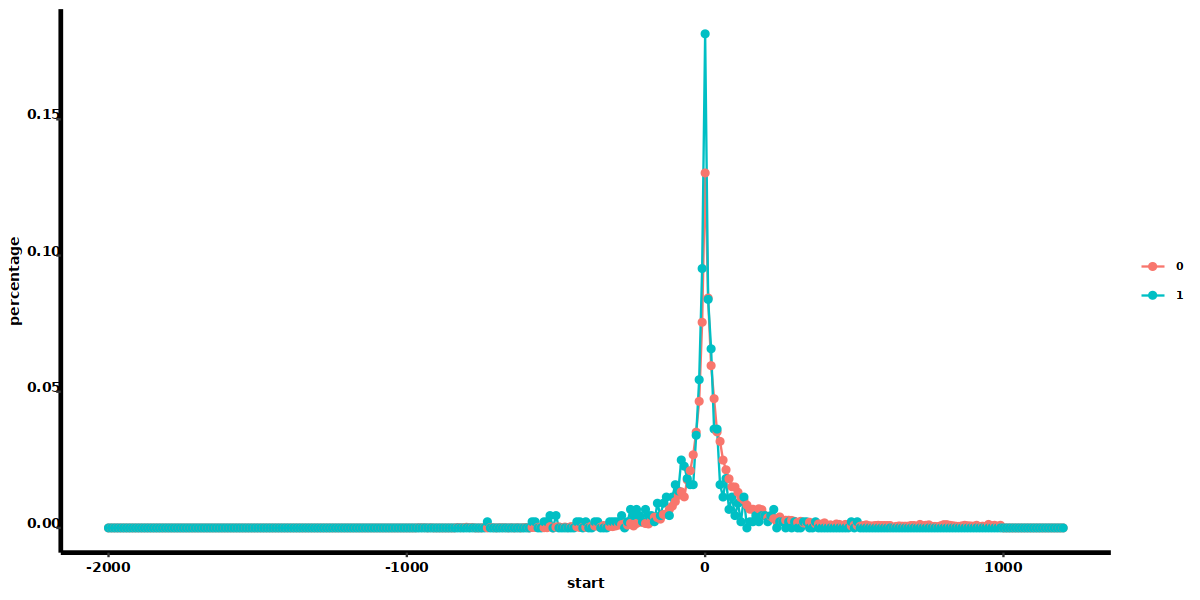

In [488]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(data=visualization_data, aes(x=start, y=percentage, col=as.character(sign))) +
  geom_line()+
  geom_point() + plot_config

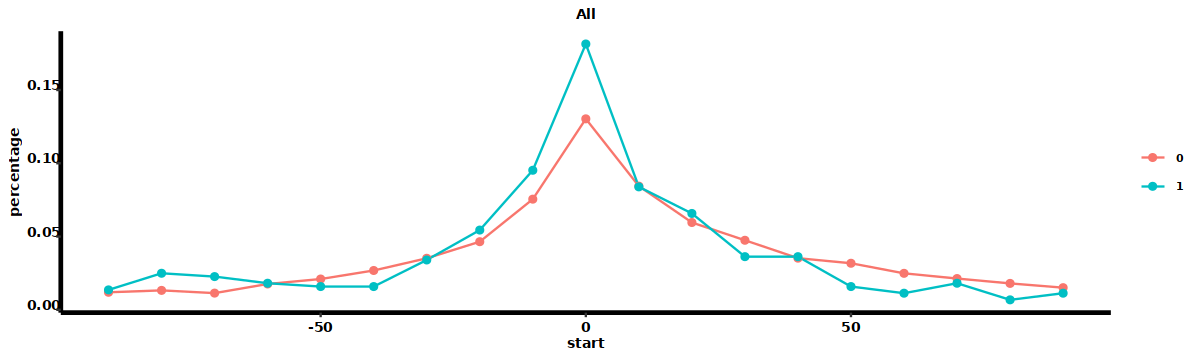

In [489]:
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(data=visualization_data[(visualization_data$start > -100) & (visualization_data$start < 100),], aes(x=start, y=percentage, col=as.character(sign))) +
  geom_line()+
  geom_point() + plot_config + ggtitle(cell_type)

## Enrichment in promoter and enhancer elements

### Fantom

In [1338]:
head(sign_snps,2)

,feature_id,rsId,snp_pos,cell_type,snp_id,X,feature_start,feature_end,p_value,beta,⋯,promoter_count,connect_decile,connect_quantile,connectedness,PPI_degree_decile,PPI_degree_quantile,PPI_degree_cat,TF,HI,hs
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,A1BG,rs5828758,19:58358468,CD4_T,19:58358468:AGT:A,3179,58345178,58353499,1.225933e-01,0.04622368,⋯,4,0,0,0,3,2,1,0,0,0.01563334
2,A1BG,rs12461352,19:58357814,CD4_T,19:58357814:C:A,3177,58345178,58353499,2.793323e-17,-0.25656812,⋯,4,0,0,0,3,2,1,0,0,0.01563334


In [1339]:
### Check percentage in promoter

In [1344]:
sign_snps$FANTOM_promoter[(is.na(sign_snps$FANTOM_promoter))  & (is.na(sign_snps$MAF)) ]= 0

In [1357]:
promoter_check = sign_snps %>% group_by(sign, FANTOM_promoter) %>% dplyr::count()

In [1361]:
promoter_check = promoter_check  %>% group_by(sign) %>% mutate(total =sum(n))

In [1365]:
promoter_check$percentage = round(promoter_check$n / promoter_check$total *100,2)

In [1366]:
promoter_check 

sign,FANTOM_promoter,n,total,percentage
<dbl>,<dbl>,<int>,<int>,<dbl>
0,0,3905,4935,79.13
0,1,33,4935,0.67
0,NA,997,4935,20.20
1,0,160,225,71.11
1,1,2,225,0.89
1,NA,63,225,28.00


In [1367]:
#sign_snps[(sign_snps$FANTOM_promoter > 0) &  (sign_snps$sign == 1) & (!is.na(sign_snps$FANTOM_promoter)),]

In [1368]:
### Check percentage in enhancer

In [1369]:
sign_snps$FANTOM_enhancer[(is.na(sign_snps$FANTOM_enhancer))  & (is.na(sign_snps$MAF)) ]= 0

In [1370]:
#sign_snps[(sign_snps$FANTOM_enhancer > 0) &  (sign_snps$sign == 1) & (!is.na(sign_snps$FANTOM_enhancer)),]

In [1371]:
enhancer_check = sign_snps %>% group_by(sign, FANTOM_enhancer) %>% dplyr::count()

In [1372]:
enhancer_check  = enhancer_check %>% group_by(sign) %>% mutate(total =sum(n))

In [1373]:
enhancer_check $percentage = round(enhancer_check$n / enhancer_check $total *100,2)

In [1374]:
enhancer_check 

sign,FANTOM_enhancer,n,total,percentage
<dbl>,<dbl>,<int>,<int>,<dbl>
0,0,3892,4935,78.87
0,1,46,4935,0.93
0,NA,997,4935,20.20
1,0,160,225,71.11
1,1,2,225,0.89
1,NA,63,225,28.00


In [1356]:
## In CD4_T only 2 out of sign category; very low number

### Encode

In [3850]:
### Get as set of random snps

In [3851]:
paper_scores_snps_subset = paper_scores_snps[!paper_scores_snps$rsID %in% unique(sign_snps$rsId),]

In [3852]:
nrow(paper_scores_snps)

[1] 7776878

In [3853]:
nrow(paper_scores_snps_subset)

[1] 7766365

In [3854]:
paper_scores_snps_subset = data.frame(paper_scores_snps_subset)

In [3855]:
# Get 100000 random rows that are not a eGene in our data
set.seed(1)
random_rows <- paper_scores_snps_subset %>% dplyr::slice_sample(n = 100000)

In [3856]:
head(random_rows,2)

,SNP,rsID,MAF,L2,TSSD,d_tss,gene,FANTOM_promoter,FANTOM_enhancer,ENCODE_PLS,ENCODE_pELS,ENCODE_dELS,snp_source,snp_pos
,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,18:72984262:C:T,rs12969532,0.0375237,52.912,3,61552,HGNC:10669,NA,NA,NA,NA,NA,set2,18:72984262
2,17:39676088:G:A,rs66491052,0.2128480,56.293,61,2693,HGNC:6421,NA,NA,NA,NA,NA,set2,17:39676088


#### Promoter like in ENCODE

In [3857]:
## For random get information on numbers of different features

In [3858]:
random_rows$ENCODE_PLS[is.na(random_rows$ENCODE_PLS)] = 0

In [3859]:
random_rows_prom = random_rows %>% group_by( ENCODE_PLS) %>% dplyr::count()

In [3860]:
random_rows_prom$total = sum(random_rows_prom$n)

In [3861]:
random_rows_prom$percentage = round(random_rows_prom$n / random_rows_prom$total *100,2)

In [3862]:
random_rows_prom  = random_rows_prom  %>% arrange(-ENCODE_PLS)

In [3863]:
random_rows_prom 

ENCODE_PLS,n,total,percentage
<dbl>,<int>,<int>,<dbl>
1,247,100000,0.25
0,99753,100000,99.75


In [3864]:
sign_snps$ENCODE_PLS[(is.na(sign_snps$ENCODE_PLS))  & (is.na(sign_snps$MAF)) ]= 0

In [3865]:
#sign_snps[(sign_snps$FANTOM_enhancer > 0) &  (sign_snps$sign == 1) & (!is.na(sign_snps$FANTOM_enhancer)),]

In [3866]:
encode_prom_check = sign_snps %>% group_by(sign, ENCODE_PLS) %>% dplyr::count()

In [3867]:
encode_prom_check  = encode_prom_check %>% group_by(sign) %>% mutate(total =sum(n))

In [3868]:
encode_prom_check$percentage = round(encode_prom_check$n / encode_prom_check$total *100,2)

In [3869]:
encode_prom_check = encode_prom_check %>% arrange(sign, -ENCODE_PLS)

In [3870]:
encode_prom_check

sign,ENCODE_PLS,n,total,percentage
<dbl>,<dbl>,<int>,<int>,<dbl>
0,1,129,12369,1.04
0,0,9648,12369,78.00
0,NA,2592,12369,20.96
1,1,8,441,1.81
1,0,315,441,71.43
1,NA,118,441,26.76


In [3871]:
## Get enrichment compared to random from fisher test

In [3872]:
odds_ratio_result = data.frame()

In [3873]:
for(i in unique(encode_prom_check$sign)){
    fisher_matrix = rbind(t(encode_prom_check[ (encode_prom_check$sign == i) & (!is.na(encode_prom_check$ENCODE_PLS)),c( 'n')]),
                      t(random_rows_prom[, c('n')]))
    result = fisher.test(fisher_matrix)
    print(fisher_matrix)
    print(fisher.test(fisher_matrix ))
    
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[1],
                           conf_lower = result$conf.int[2])
    or_result$feature =  'ENCODE_PLS'
    or_result$sign = i
    odds_ratio_result = rbind(or_result, odds_ratio_result)
    }
    

  [,1]  [,2]
n  129  9648
n  247 99753

	Fisher's Exact Test for Count Data

data:  fisher_matrix
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 4.325075 6.715205
sample estimates:
odds ratio 
  5.399937 

  [,1]  [,2]
n    8   315
n  247 99753

	Fisher's Exact Test for Count Data

data:  fisher_matrix
p-value = 2.111e-06
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  4.340973 20.772219
sample estimates:
odds ratio 
   10.2567 



In [3874]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,feature,sign
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
odds ratio,2.110642e-06,10.256697,4.340973,20.772219,ENCODE_PLS,1
odds ratio1,1.037404e-42,5.399937,4.325075,6.715205,ENCODE_PLS,0


####  proximal enhancer like encode

In [3875]:
## For random get information on numbers of different features

In [3876]:
random_rows$ENCODE_pELS[is.na(random_rows$ENCODE_pELS)] = 0

In [3877]:
random_rows$ENCODE_pELS[random_rows$ENCODE_pELS >1] = 1

In [3878]:
random_rows_prom = random_rows %>% group_by( ENCODE_pELS) %>% dplyr::count()

In [3879]:
random_rows_prom$total = sum(random_rows_prom$n)

In [3880]:
random_rows_prom$percentage = round(random_rows_prom$n / random_rows_prom$total *100,2)

In [3881]:
random_rows_prom  = random_rows_prom  %>% arrange(-ENCODE_pELS)

In [3882]:
random_rows_prom 

ENCODE_pELS,n,total,percentage
<dbl>,<int>,<int>,<dbl>
1,971,100000,0.97
0,99029,100000,99.03


In [3883]:
### For eqtl and coeqtl snps

In [3884]:
sign_snps$ENCODE_pELS[(is.na(sign_snps$ENCODE_pELS))  & (is.na(sign_snps$MAF)) ]= 0

In [3885]:
#sign_snps[(sign_snps$FANTOM_enhancer > 0) &  (sign_snps$sign == 1) & (!is.na(sign_snps$FANTOM_enhancer)),]

In [3886]:
encode_enh_prox_check = sign_snps %>% group_by(sign, ENCODE_pELS) %>% dplyr::count()

In [3887]:
encode_enh_prox_check  = encode_enh_prox_check %>% group_by(sign) %>% mutate(total =sum(n))

In [3888]:
encode_enh_prox_check$percentage = round(encode_enh_prox_check$n /encode_enh_prox_check$total *100,2)

In [3889]:
encode_enh_prox_check =encode_enh_prox_check %>% arrange(sign, - ENCODE_pELS)

In [3890]:
encode_enh_prox_check

sign,ENCODE_pELS,n,total,percentage
<dbl>,<dbl>,<int>,<int>,<dbl>
0,1,358,12369,2.89
0,0,9419,12369,76.15
0,NA,2592,12369,20.96
1,1,12,441,2.72
1,0,311,441,70.52
1,NA,118,441,26.76


In [3891]:
## Get enrichment compared to random from fisher test

In [3892]:
#odds_ratio_result = data.frame()

In [3893]:
for(i in unique(encode_enh_prox_check$sign)){
    fisher_matrix = rbind(t(encode_enh_prox_check[ (encode_enh_prox_check$sign == i) & (!is.na(encode_enh_prox_check$ENCODE_pELS)),c( 'n')]),
                      t(random_rows_prom[, c('n')]))
    result = fisher.test(fisher_matrix)
    print(fisher_matrix)
    print(fisher.test(fisher_matrix ))
    
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[1],
                           conf_lower = result$conf.int[2])
    or_result$feature =  'ENCODE_pELS'
    or_result$sign = i
    odds_ratio_result = rbind(or_result, odds_ratio_result)
    }
    

  [,1]  [,2]
n  358  9419
n  971 99029

	Fisher's Exact Test for Count Data

data:  fisher_matrix
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 3.417918 4.388884
sample estimates:
odds ratio 
  3.875889 

  [,1]  [,2]
n   12   311
n  971 99029

	Fisher's Exact Test for Count Data

data:  fisher_matrix
p-value = 0.0001006
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.004465 7.004403
sample estimates:
odds ratio 
  3.935073 



In [3894]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,feature,sign
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
odds ratio,1.005959e-04,3.935073,2.004465,7.004403,ENCODE_pELS,1
odds ratio3,1.094649e-82,3.875889,3.417918,4.388884,ENCODE_pELS,0
odds ratio2,2.110642e-06,10.256697,4.340973,20.772219,ENCODE_PLS,1
odds ratio1,1.037404e-42,5.399937,4.325075,6.715205,ENCODE_PLS,0


#### distal enhancer like encode

In [3895]:
## For random get information on numbers of different features

In [3896]:
random_rows$ENCODE_dELS[is.na(random_rows$ENCODE_dELS)] = 0

In [3897]:
random_rows$ENCODE_dELS[random_rows$ENCODE_dELS >1] = 1

In [3898]:
random_rows_prom = random_rows %>% group_by( ENCODE_dELS) %>% dplyr::count()

In [3899]:
random_rows_prom$total = sum(random_rows_prom$n)

In [3900]:
random_rows_prom$percentage = round(random_rows_prom$n / random_rows_prom$total *100,2)

In [3901]:
random_rows_prom  = random_rows_prom  %>% arrange(-ENCODE_dELS)

In [3902]:
random_rows_prom 

ENCODE_dELS,n,total,percentage
<dbl>,<int>,<int>,<dbl>
1,6035,100000,6.04
0,93965,100000,93.97


In [3903]:
## for eqtl or coeqtl snps

In [3904]:
sign_snps$ENCODE_dELS[(is.na(sign_snps$ENCODE_dELS))  & (is.na(sign_snps$MAF)) ]= 0

In [3905]:
#sign_snps[(sign_snps$FANTOM_enhancer > 0) &  (sign_snps$sign == 1) & (!is.na(sign_snps$FANTOM_enhancer)),]

In [3906]:
encode_enh_dist_check = sign_snps %>% group_by(sign, ENCODE_dELS) %>% dplyr::count()

In [3907]:
encode_enh_dist_check = encode_enh_dist_check %>% group_by(sign) %>% mutate(total =sum(n))

In [3908]:
encode_enh_dist_check$percentage = round(encode_enh_dist_check$n /encode_enh_dist_check$total *100,2)

In [3909]:
encode_enh_dist_check = encode_enh_dist_check %>% arrange(sign, -ENCODE_dELS)

In [3910]:
encode_enh_dist_check

sign,ENCODE_dELS,n,total,percentage
<dbl>,<dbl>,<int>,<int>,<dbl>
0,1,884,12369,7.15
0,0,8893,12369,71.90
0,NA,2592,12369,20.96
1,1,35,441,7.94
1,0,288,441,65.31
1,NA,118,441,26.76


In [3911]:
## Fisher Test

In [3912]:
for(i in unique(encode_enh_dist_check$sign)){
    fisher_matrix = rbind(t(encode_enh_dist_check[ (encode_enh_dist_check$sign == i) & (!is.na(encode_enh_dist_check$ENCODE_dELS)),c( 'n')]),
                      t(random_rows_prom[, c('n')]))
    result = fisher.test(fisher_matrix)
    print(fisher_matrix)
    print(fisher.test(fisher_matrix ))
    
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[1],
                           conf_lower = result$conf.int[2])
    or_result$feature =  'ENCODE_dELS'
    or_result$sign = i
    odds_ratio_result = rbind(or_result, odds_ratio_result)
    }
    

  [,1]  [,2]
n  884  8893
n 6035 93965

	Fisher's Exact Test for Count Data

data:  fisher_matrix
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.435878 1.666865
sample estimates:
odds ratio 
  1.547705 

  [,1]  [,2]
n   35   288
n 6035 93965

	Fisher's Exact Test for Count Data

data:  fisher_matrix
p-value = 0.0009273
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.291138 2.696485
sample estimates:
odds ratio 
  1.892244 



In [3913]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,feature,sign
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
odds ratio,9.272599e-04,1.892244,1.291138,2.696485,ENCODE_dELS,1
odds ratio5,1.671056e-28,1.547705,1.435878,1.666865,ENCODE_dELS,0
odds ratio4,1.005959e-04,3.935073,2.004465,7.004403,ENCODE_pELS,1
odds ratio3,1.094649e-82,3.875889,3.417918,4.388884,ENCODE_pELS,0
odds ratio2,2.110642e-06,10.256697,4.340973,20.772219,ENCODE_PLS,1
odds ratio1,1.037404e-42,5.399937,4.325075,6.715205,ENCODE_PLS,0


In [3914]:
### Plot the  result of the enrichment

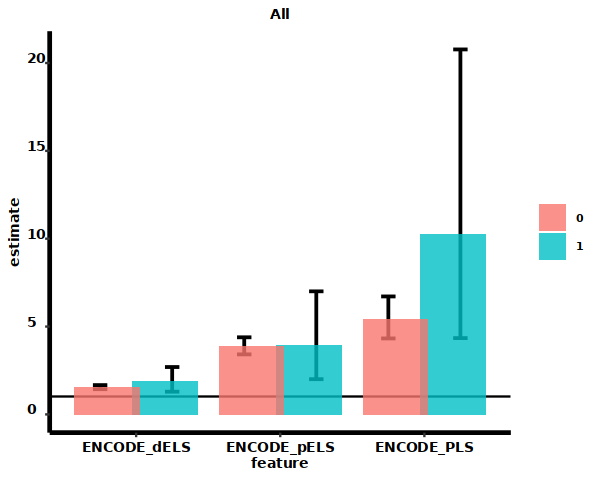

In [3915]:
# Create the plot
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(odds_ratio_result, aes(x = feature, y = estimate, fill = as.character(sign))) +
  #geom_point(size = 3, position = position_dodge()) +                                  # Plot points
  geom_errorbar(aes(ymin = conf_lower, 
                    ymax = conf_upper), 
                width = 0.2, size = 0.8, position = position_dodge(width = 1)) +  plot_config +   geom_hline(yintercept=1) +   geom_bar(stat = "identity",position = position_dodge(width = 0.8), alpha = 0.8) + ggtitle(cell_type)

## Saha et al connectedness

In [195]:
# decile of the connectedness score computed using co-expression networks inferred by Saha et al., Genome Research 2017 

In [196]:
colnames(egene_data)

[1] "eGene"                      "hgnc_id"                   
 [3] "sign"                       "GeneSymbol"                
 [5] "TSSD"                       "length"                    
 [7] "CDS_length"                 "pLI"                       
 [9] "LOEUF"                      "ABC_count"                 
[11] "ABC_length_per_type"        "Roadmap_count"             
[13] "Roadmap_length_per_type"    "promoter_count"            
[15] "connect_decile"             "connect_quantile"          
[17] "connectedness"              "PPI_degree_decile"         
[19] "PPI_degree_quantile"        "PPI_degree_cat"            
[21] "TF"                         "HI"                        
[23] "hs"                         "GO_BP_count"               
[25] "GO_BP_count_400_auc"        "GO_BP_count_400_auc_decile"
[27] "weighted_mean_expression"

In [197]:
unique(egene_data$connectedness)

[1] 0 1

In [198]:
unique(egene_data$connect_decile)

[1]  0 10  6  1  4  9  8  7  3  2  5

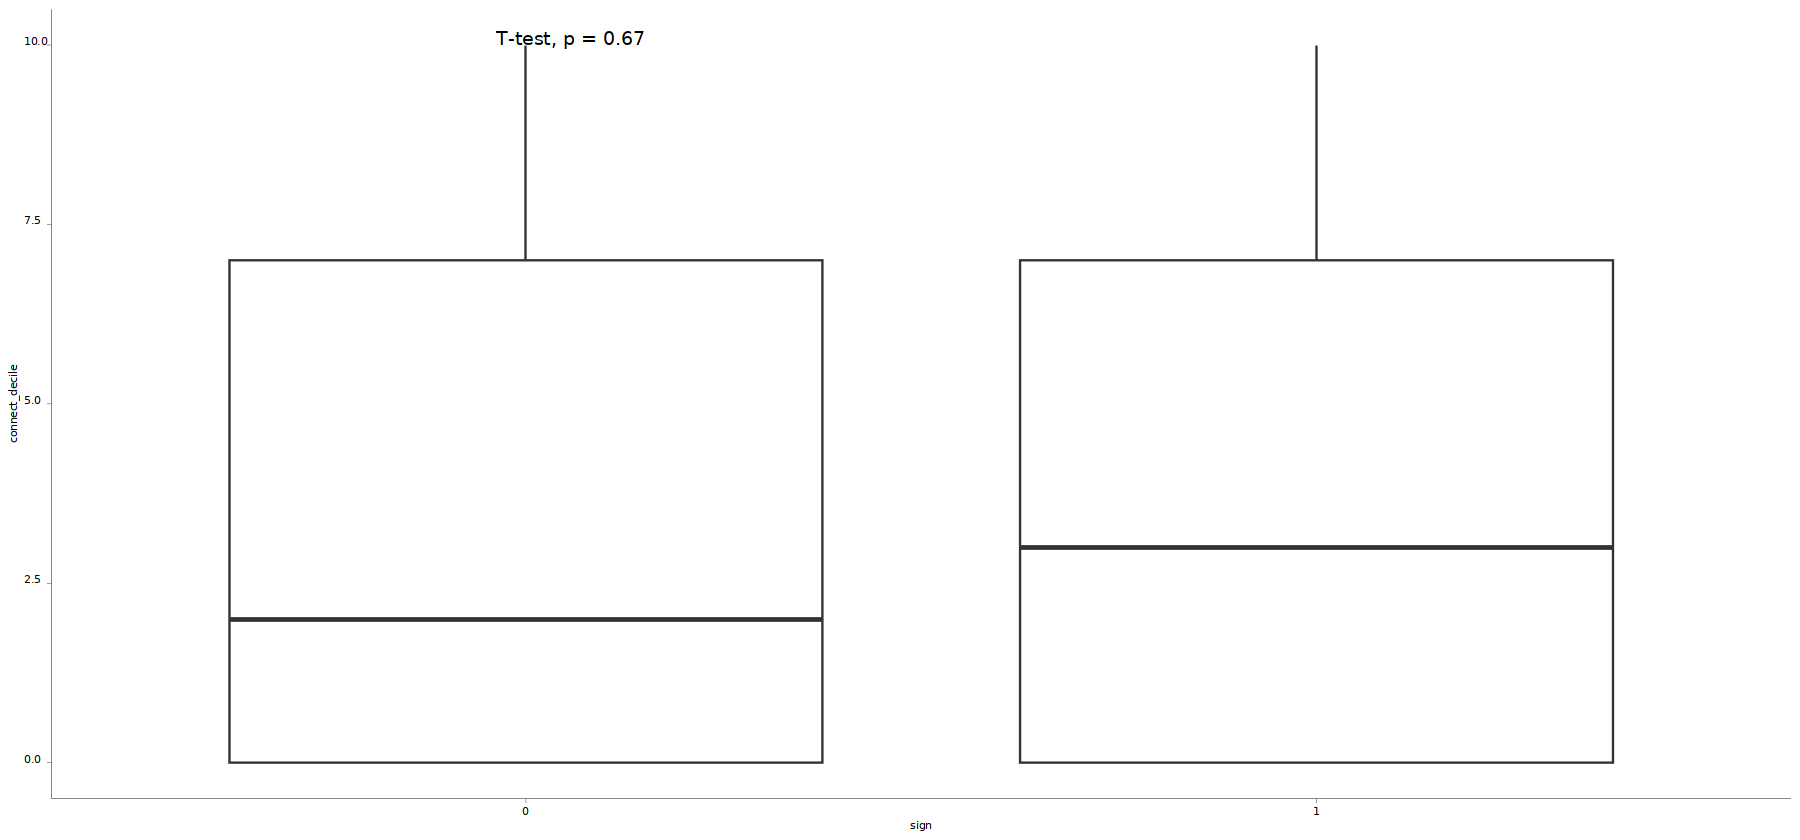

In [199]:
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(egene_data, aes(x=sign, y=connect_decile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [200]:
### Plot quantiles of connectednes

In [201]:
unique(egene_data$connect_quantile)

[1] 0 5 3 1 2 4

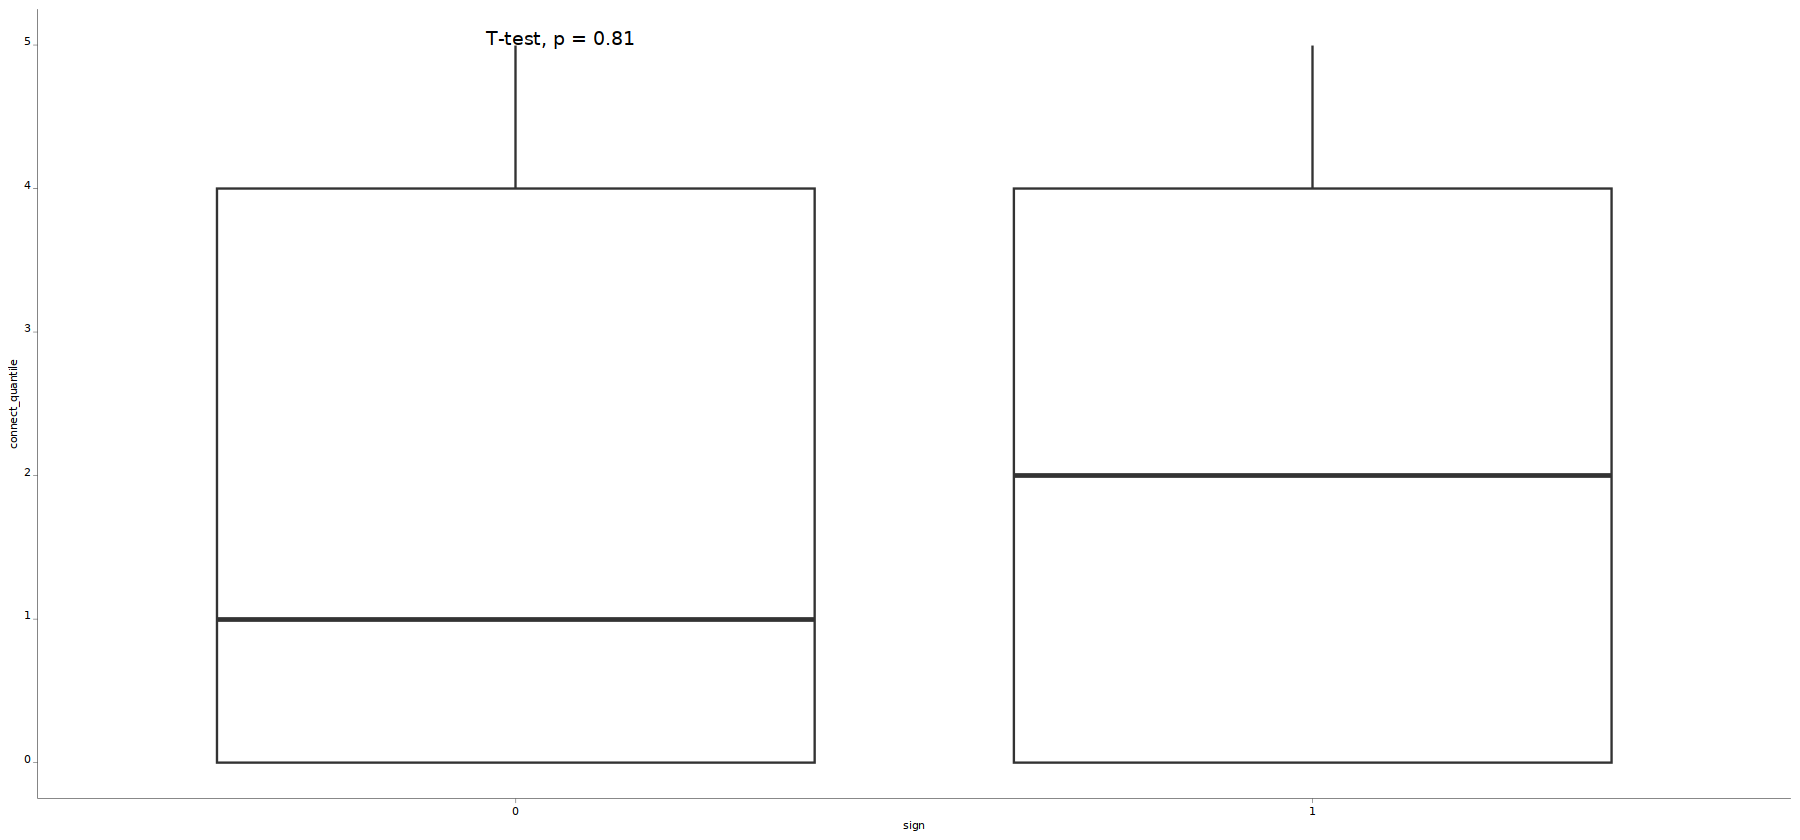

In [202]:
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(egene_data, aes(x=sign, y=connect_quantile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [203]:
### Percentage of genes per connectednes quantile

In [204]:
quant_eval = egene_data %>% group_by(sign, connect_quantile) %>% summarise(amount_genes = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [205]:
quant_eval

sign,connect_quantile,amount_genes
<chr>,<int>,<int>
0,0,2066
0,1,486
0,2,535
0,3,531
0,4,586
0,5,640
1,0,126
1,1,19
1,2,41


In [206]:
quant_eval = quant_eval %>% group_by(sign) %>% mutate(total_genes = sum(amount_genes))

In [207]:
quant_eval$percentage = quant_eval$amount_genes/ quant_eval$total_genes

In [208]:
### Perform an enrichment test for each quantile

In [209]:
quant_eval$amount_neg_genes = quant_eval$total_genes - quant_eval$amount_genes

In [210]:
quant_eval %>% arrange(-as.numeric(sign))

sign,connect_quantile,amount_genes,total_genes,percentage,amount_neg_genes
<chr>,<int>,<int>,<int>,<dbl>,<int>
1,0,126,291,0.43298969,165
1,1,19,291,0.06529210,272
1,2,41,291,0.14089347,250
1,3,28,291,0.09621993,263
1,4,40,291,0.13745704,251
1,5,37,291,0.12714777,254
0,0,2066,4844,0.42650702,2778
0,1,486,4844,0.10033031,4358
0,2,535,4844,0.11044591,4309


In [211]:
contingency_table_data = data.frame()
odds_ratio_result = data.frame()

In [212]:
for(i in unique(quant_eval$connect_quantile)){
    quant_eval = quant_eval %>% arrange(-as.numeric(sign))
    contingency_table = quant_eval[quant_eval$connect_quantile == i, c('amount_genes', 'amount_neg_genes', 'connect_quantile')]
    if(nrow(contingency_table) == 2){
    contingency_table$connect_quantile = NULL
    print(contingency_table)
    contingency_table = as.matrix (contingency_table)
    
    result = fisher.test(contingency_table)
    print(i)
    print(result)
        
    ## save the data
    contingency_table = as.data.frame(contingency_table)
    contingency_table$is_coeqtl = c(1,0)
    contingency_table$connect_quantile = i
    contingency_table_data = rbind(contingency_table_data, contingency_table)
        
        
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1])
    or_result$connect_quantile = i
    odds_ratio_result = rbind(odds_ratio_result, or_result)
        }}

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1          126              165
2         2066             2778
[1] 0

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.8548
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8019268 1.3122258
sample estimates:
odds ratio 
  1.026812 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           19              272
2          486             4358
[1] 1

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.05367
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.3678787 1.0089292
sample estimates:
odds ratio 
  0.626426 

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           41              250
2          535             4309
[1] 2

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value = 0.

In [213]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,connect_quantile
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
odds ratio,0.85482809,1.0268118,1.312226,0.8019268,0
odds ratio1,0.05366858,0.6264260,1.008929,0.3678787,1
odds ratio2,0.12508686,1.3208090,1.868814,0.9139764,2
odds ratio3,0.56060515,0.8647823,1.294894,0.5578357,3
odds ratio4,0.40621865,1.1578998,1.642041,0.7987869,4
odds ratio5,0.85876172,0.9568652,1.370252,0.6520356,5


In [214]:
### Plot the odds ratio result

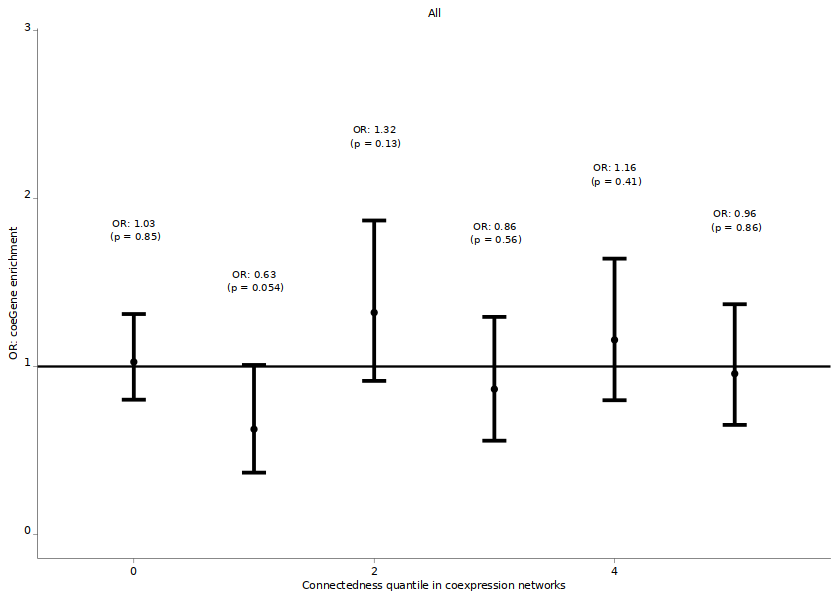

In [215]:
options(repr.plot.width = 7, repr.plot.height = 5)
or_plot = ggplot(odds_ratio_result, aes(x = connect_quantile, y = estimate )) +
geom_point(size = 1) + geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2)  +                           # Plot points
geom_errorbar(aes(ymin = conf_lower, 
                ymax = conf_upper), 
            width = 0.2, size = 0.8) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_result$conf_upper) + 1) + ggtitle(cell_type) + plot_config + xlab('Connectedness quantile in coexpression networks') + xlim(-0.5, max(odds_ratio_result$connect_quantile) +0.5) + ylab('OR: coeGene enrichment')# + theme(axis.title.y = element_blank(), axis.title.x = element_blank())
or_plot

In [216]:
pdf(paste0('figures/I1/I1_OR_Connectedness_quant_coexpression_', cell_type, '.pdf'), width =3.5, height = 2)
or_plot
dev.off()

pdf 
  2

In [217]:
### Add enrichment to connectedness line plto

In [218]:
quant_eval = merge(quant_eval, odds_ratio_result, by.x = 'connect_quantile', by.y = 'connect_quantile')

In [219]:
quant_eval$label = ''
quant_eval$label[quant_eval$p_value < 0.05] = round(quant_eval$p_value[quant_eval$p_value < 0.05],2)

In [220]:
quant_eval

connect_quantile,sign,amount_genes,total_genes,percentage,amount_neg_genes,p_value,estimate,conf_upper,conf_lower,label
<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0,1,126,291,0.43298969,165,0.85482809,1.0268118,1.312226,0.8019268,
0,0,2066,4844,0.42650702,2778,0.85482809,1.0268118,1.312226,0.8019268,
1,1,19,291,0.06529210,272,0.05366858,0.6264260,1.008929,0.3678787,
1,0,486,4844,0.10033031,4358,0.05366858,0.6264260,1.008929,0.3678787,
2,0,535,4844,0.11044591,4309,0.12508686,1.3208090,1.868814,0.9139764,
2,1,41,291,0.14089347,250,0.12508686,1.3208090,1.868814,0.9139764,
3,0,531,4844,0.10962015,4313,0.56060515,0.8647823,1.294894,0.5578357,
3,1,28,291,0.09621993,263,0.56060515,0.8647823,1.294894,0.5578357,
4,1,40,291,0.13745704,251,0.40621865,1.1578998,1.642041,0.7987869,


In [221]:
#head(odds_ratio_result,2)

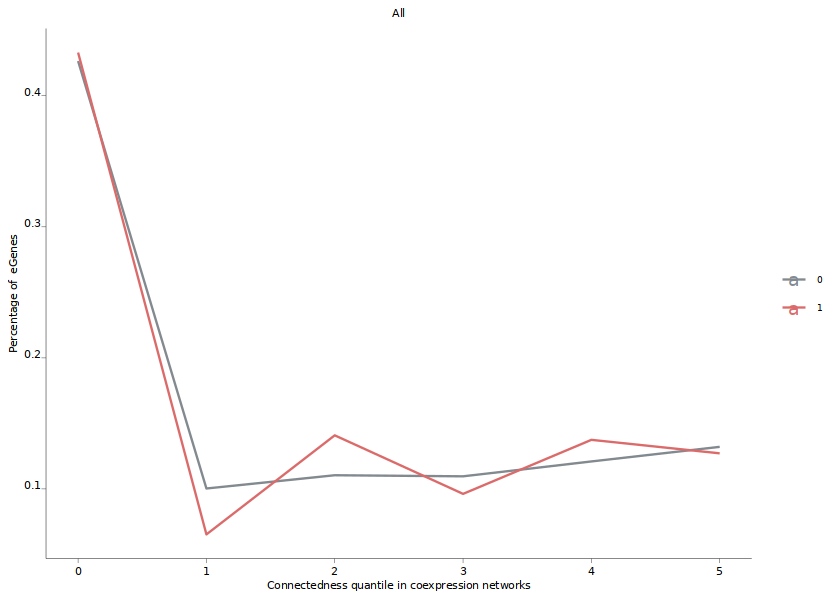

In [222]:
options(repr.plot.width = 7, repr.plot.height = 5)
connect_quantile_plot = ggplot(quant_eval, aes(x=connect_quantile, y=percentage, color = as.character(sign))) + geom_text(aes(label = label)) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Connectedness quantile in coexpression networks') + ylab('Percentage of  eGenes')
connect_quantile_plot

In [223]:
pdf(paste0('figures/I1/I1_Connectedness_quant_coexpression_', cell_type, '.pdf'), width =3.5, height = 1.5)
connect_quantile_plot
dev.off()

pdf 
  2

In [224]:
## indicator variable for having 0 or >0 connections in co-expression networks inferred by Saha et al., Genome Research 2017

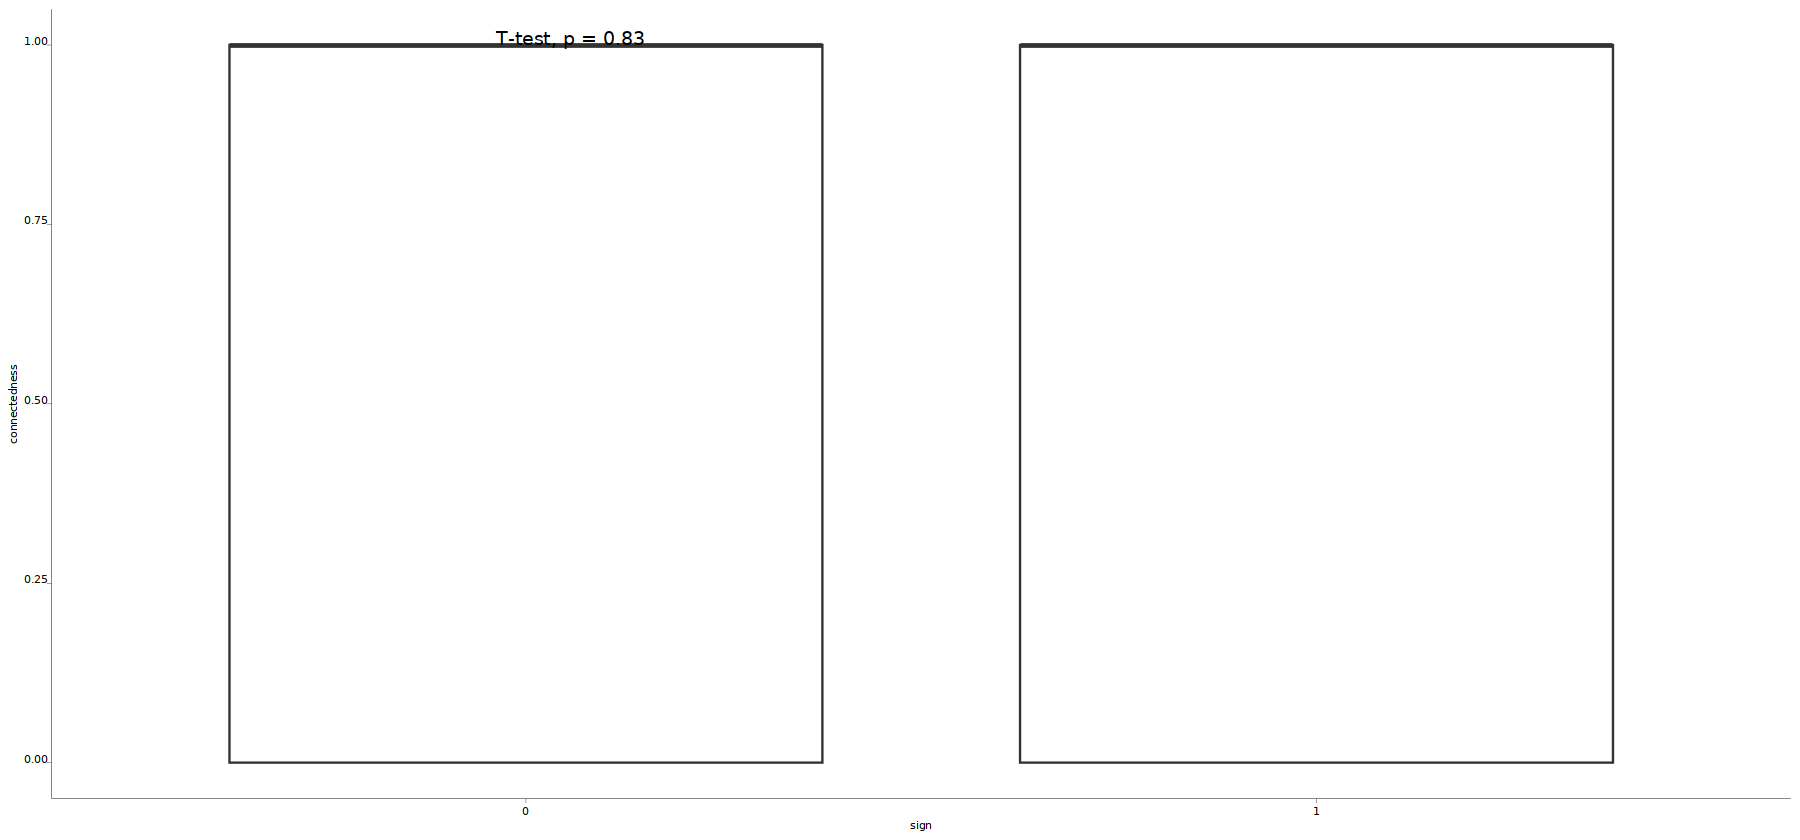

In [225]:
options(repr.plot.width = 15, repr.plot.height = 7)
ggplot(egene_data, aes(x=sign, y=connectedness)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

## Connectedness InWeb PPI networks

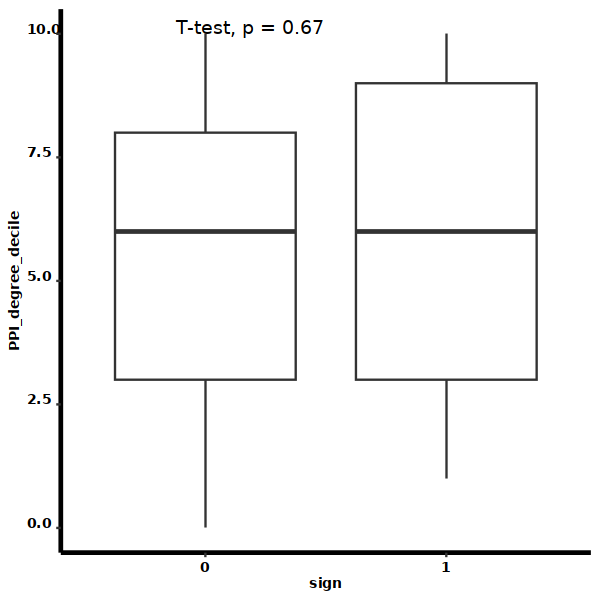

In [3432]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=sign, y=PPI_degree_decile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

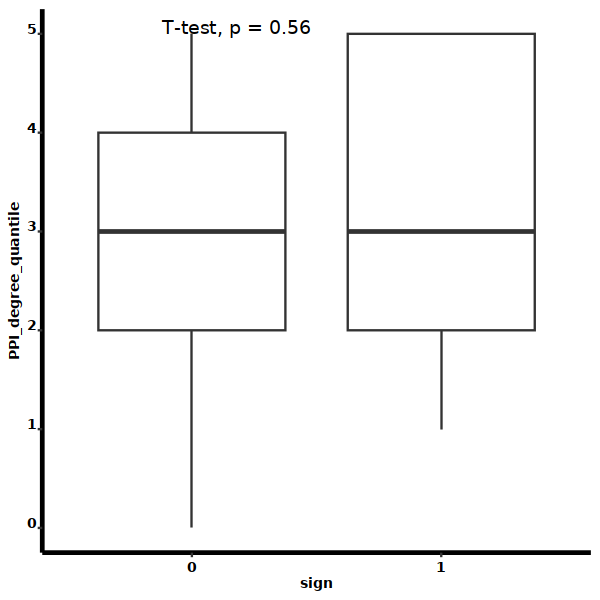

In [3433]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=sign, y=PPI_degree_quantile)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [3434]:
### Percentage of genes per connectednes quantile

In [3435]:
#head(egene_data,2)

In [3436]:
quant_eval = egene_data %>% group_by(sign, PPI_degree_quantile) %>% summarise(amount_genes = n())

`summarise()` has grouped output by 'sign'. You can override using the
`.groups` argument.


In [3437]:
#quant_eval

In [3438]:
quant_eval = quant_eval %>% group_by(sign) %>% mutate(total_genes = sum(amount_genes))

In [3439]:
quant_eval$percentage = quant_eval$amount_genes/ quant_eval$total_genes

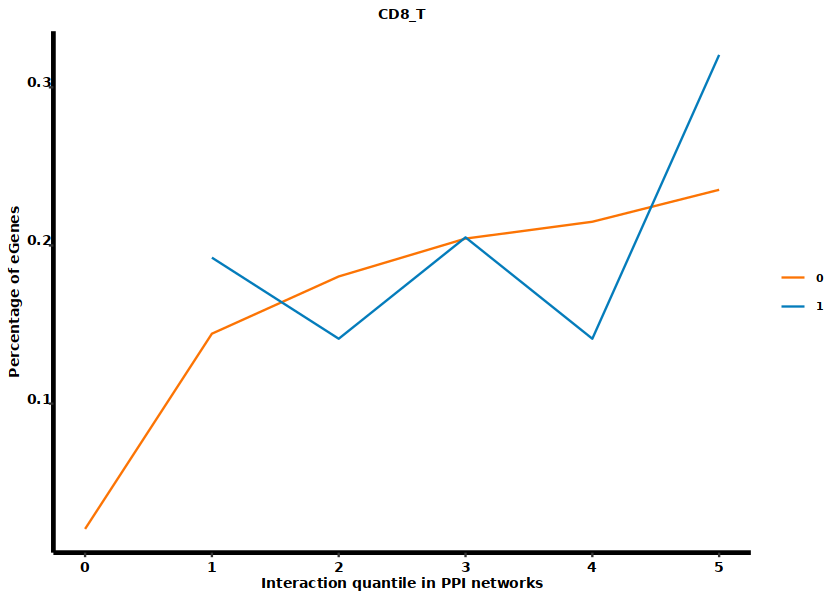

In [3440]:
options(repr.plot.width = 7, repr.plot.height = 5)
connect_quantile_plot_ppi = ggplot(quant_eval, aes(x=PPI_degree_quantile, y=percentage, color = as.character(sign))) +
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Interaction quantile in PPI networks') + ylab('Percentage of eGenes')
connect_quantile_plot_ppi

In [3441]:
pdf(paste0('figures/I1/I1_Connectedness_quant_PPI_', cell_type, '.pdf'), width =3.5, height = 1.5)
connect_quantile_plot_ppi
dev.off()

pdf 
  2

In [3442]:
### Perform an enrichment test for each quantile

In [3443]:
quant_eval$amount_neg_genes = quant_eval$total_genes - quant_eval$amount_genes

In [3444]:
quant_eval$sign = as.numeric(quant_eval$sign)

In [3445]:
#quant_eval %>% arrange(-sign)

In [3446]:
contingency_table_data = data.frame()
odds_ratio_result = data.frame()

In [3447]:
for(i in unique(quant_eval$PPI_degree_quantile)){
    quant_eval = quant_eval %>% arrange(-sign)
    contingency_table = quant_eval[quant_eval$PPI_degree_quantile == i, c('amount_genes', 'amount_neg_genes', 'PPI_degree_quantile')]
    if(nrow(contingency_table) == 2){
    contingency_table$PPI_degree_quantile = NULL
    print(contingency_table)
    contingency_table = as.matrix (contingency_table)
    
    result = fisher.test(contingency_table)
    #print(i)
    #print(result)
        
    ## save the data
    contingency_table = as.data.frame(contingency_table)
    contingency_table$is_coeqtl = c(1,0)
    contingency_table$PPI_degree_quantile = i
    contingency_table_data = rbind(contingency_table_data, contingency_table)
        
        
    or_result = data.frame(p_value = result$p.value,
                           estimate = result$estimate,
                           conf_upper = result$conf.int[2],
                           conf_lower = result$conf.int[1])
    or_result$PPI_degree_quantile = i
    odds_ratio_result = rbind(odds_ratio_result, or_result)
        }}

# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           15               63
2          271             1608
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           11               67
2          339             1540
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           16               62
2          384             1495
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           11               67
2          404             1475
# A tibble: 2 × 2
  amount_genes amount_neg_genes
         <int>            <int>
1           25               53
2          442             1437


In [3448]:
odds_ratio_result

,p_value,estimate,conf_upper,conf_lower,PPI_degree_quantile
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
odds ratio,0.2510099,1.4124761,2.554375,0.7358232,1
odds ratio1,0.4516356,0.7459339,1.441271,0.3515548,2
odds ratio2,1.0000000,1.0047019,1.786825,0.5348883,3
odds ratio3,0.1560688,0.5995697,1.156486,0.2829621,4
odds ratio4,0.1025939,1.5331833,2.545159,0.9017360,5


In [3449]:
### Plot the odds ratio result

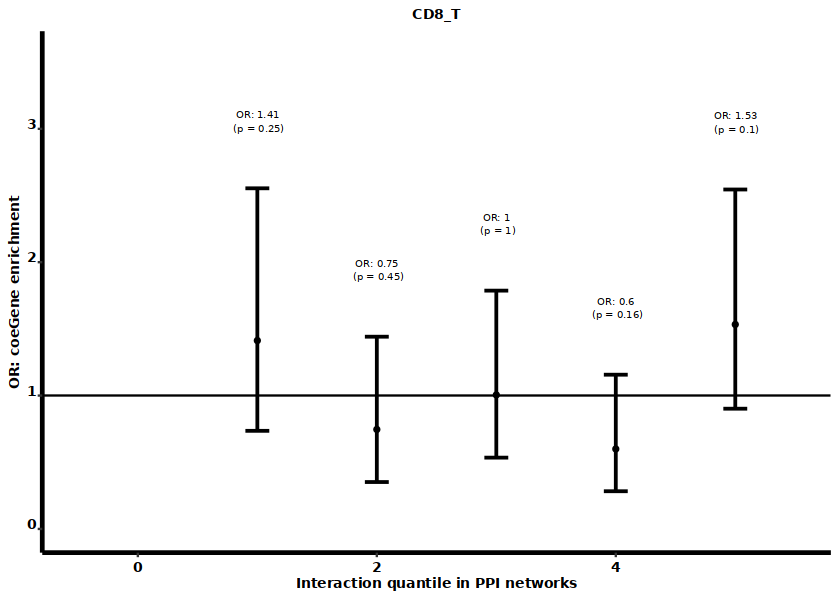

In [3450]:
options(repr.plot.width = 7, repr.plot.height = 5)
or_plot = ggplot(odds_ratio_result, aes(x =PPI_degree_quantile, y = estimate )) +
geom_point(size = 1) + geom_text(aes(y = conf_upper +0.5, label =paste0('OR: ', round(estimate, 2), "\n", ' (p = ', signif(p_value, digits = 2), ')')  ), size = 2)  +                           # Plot points
geom_errorbar(aes(ymin = conf_lower, 
                ymax = conf_upper), 
            width = 0.2, size = 0.8) +  plot_config  +  geom_hline(yintercept=1) + ylim(0,max(odds_ratio_result$conf_upper) + 1) + ggtitle(cell_type) + plot_config + xlab('Interaction quantile in PPI networks') + xlim(-0.5, max(odds_ratio_result$PPI_degree_quantile) +0.5) + ylab('OR: coeGene enrichment')# + theme(axis.title.y = element_blank(), axis.title.x = element_blank())
or_plot

In [3451]:
pdf(paste0('figures/I1/I1_OR_Connectedness_quant_PPI_', cell_type, '.pdf'), width =3.5, height = 2)
or_plot
dev.off()

pdf 
  2

In [3452]:
### Add enrichment to connectedness line plto

In [3453]:
#head(odds_ratio_result,2)

In [3454]:
quant_eval = merge(quant_eval, odds_ratio_result, by.x = 'PPI_degree_quantile', by.y = 'PPI_degree_quantile')

In [3455]:
quant_eval$label = NA
quant_eval$label[(quant_eval$p_value < 0.05) & (quant_eval$sign == 1)] = paste0('p = ', signif(quant_eval$p_value[quant_eval$p_value < 0.05], digits = 2))

In [3456]:
quant_eval

PPI_degree_quantile,sign,amount_genes,total_genes,percentage,amount_neg_genes,p_value,estimate,conf_upper,conf_lower,label
<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,15,78,0.1923077,63,0.2510099,1.4124761,2.554375,0.7358232,NA
1,0,271,1879,0.1442257,1608,0.2510099,1.4124761,2.554375,0.7358232,NA
2,0,339,1879,0.1804151,1540,0.4516356,0.7459339,1.441271,0.3515548,NA
2,1,11,78,0.1410256,67,0.4516356,0.7459339,1.441271,0.3515548,NA
3,0,384,1879,0.2043640,1495,1.0000000,1.0047019,1.786825,0.5348883,NA
3,1,16,78,0.2051282,62,1.0000000,1.0047019,1.786825,0.5348883,NA
4,1,11,78,0.1410256,67,0.1560688,0.5995697,1.156486,0.2829621,NA
4,0,404,1879,0.2150080,1475,0.1560688,0.5995697,1.156486,0.2829621,NA
5,1,25,78,0.3205128,53,0.1025939,1.5331833,2.545159,0.9017360,NA


Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_text()`)."


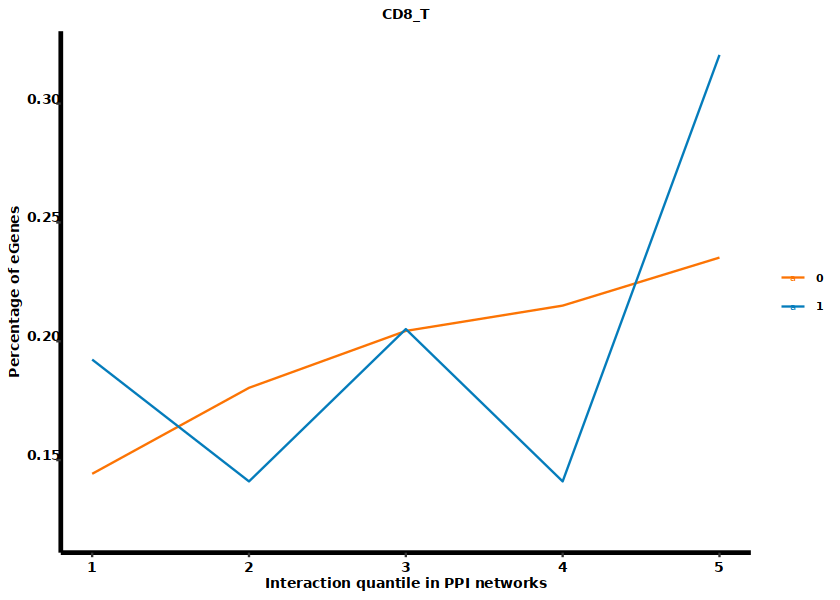

In [3457]:
options(repr.plot.width = 7, repr.plot.height = 5)
connect_quantile_plot_ppi = ggplot(quant_eval, aes(x=PPI_degree_quantile, y=percentage, color = as.character(sign))) + geom_text(aes(label = label, y = percentage - 0.02), size = 2) + 
  geom_line() + theme(text = element_text(size = 20)) + ylab('percentage genes') + plot_config  + coeqtl_col + ggtitle(cell_type) + xlab('Interaction quantile in PPI networks') + ylab('Percentage of eGenes')
connect_quantile_plot_ppi

In [3458]:
pdf(paste0('figures/I1/I1_Connectedness_quant_PPI_', cell_type, '.pdf'), width =3.5, height = 1.5)
connect_quantile_plot_ppi
dev.off()

Warning message:
"Removed 10 rows containing missing values or values outside the scale range
(`geom_text()`)."


pdf 
  2

## Connectedness Model

In [3459]:
### Scale features to use in model

In [3460]:
# Define the columns to scale as a character vector
cols_to_scale <- c("weighted_mean_expression" ,'CDS_length',  'connect_quantile','GO_BP_count_400_auc', 'hs', 'length', 'LOEUF', 'pLI',  'PPI_degree_quantile', 'promoter_count', 'Roadmap_count',
                  'Roadmap_length_per_type','TSSD' )

# Apply scaling to the selected columns only
egene_data_scaled = egene_data
egene_data_scaled[cols_to_scale] <-lapply(egene_data_scaled[cols_to_scale], function(x) as.numeric(scale(x)))
                                            
#coegene_data_scaled[cols_to_scale]  = lapply(coegene_data_scaled[cols_to_scale], function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))

In [3461]:
### Estimate the model (V2: use residualy after correcting for expression)

In [3462]:
model_form = 'residuals ~ connect_quantile + PPI_degree_quantile'

In [3463]:
test  = egene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Waiting for profiling to be done...



In [3464]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.171948809,0.01247304,-13.7856389,2.502454e-41,-0.19639552,-0.14750210,(Intercept)
connect_quantile,-0.004202404,0.01248617,-0.3365647,7.364812e-01,-0.02867484,0.02027004,connect_quantile
PPI_degree_quantile,0.003756883,0.01248617,0.3008836,7.635353e-01,-0.02071556,0.02822932,PPI_degree_quantile


In [3465]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [3466]:
coef = coef[coef$variable != '(Intercept)',]

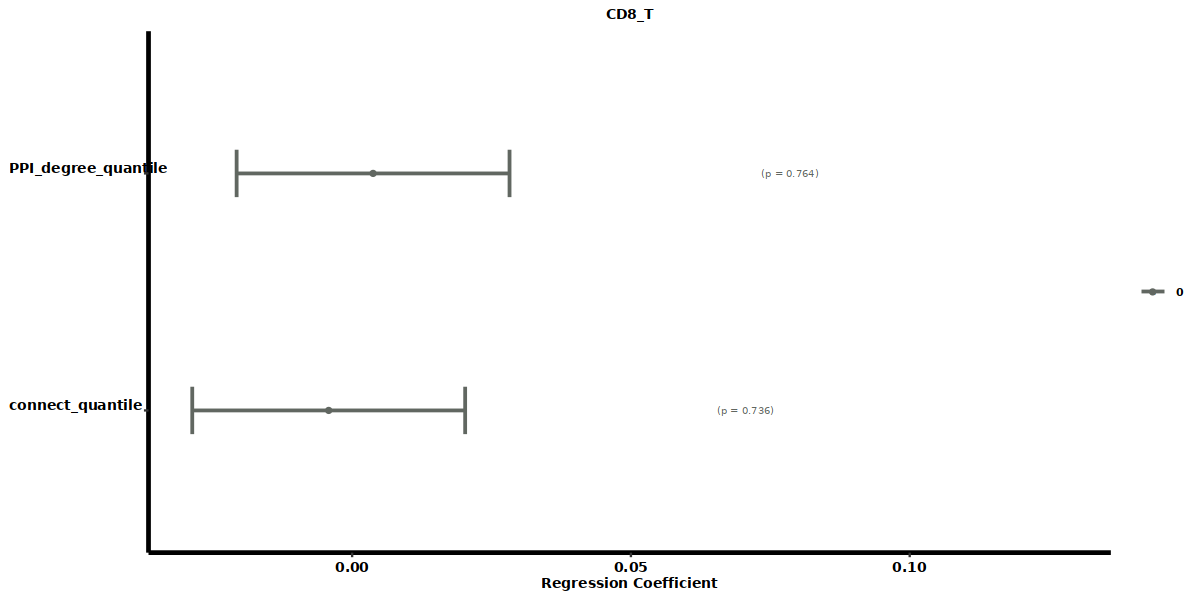

In [3467]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#047cbb", "0"="#616761")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [3468]:
pdf(paste0('figures/I1/I1_Residual_Model_', model_form , cell_type, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

## LOEUF model

In [3469]:
### Scale features to use in model

In [3470]:
# Define the columns to scale as a character vector
cols_to_scale <- c("weighted_mean_expression" ,'CDS_length',  'connect_quantile','GO_BP_count_400_auc', 'hs', 'length', 'LOEUF', 'pLI',  'PPI_degree_quantile', 'promoter_count', 'Roadmap_count',
                  'Roadmap_length_per_type','TSSD' )

# Apply scaling to the selected columns only
egene_data_scaled = egene_data
egene_data_scaled[cols_to_scale] <-lapply(egene_data_scaled[cols_to_scale], function(x) as.numeric(scale(x)))
                                            
#coegene_data_scaled[cols_to_scale]  = lapply(coegene_data_scaled[cols_to_scale], function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))

In [3471]:
model_form = 'residuals ~ LOEUF'

In [3472]:
test  = egene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Waiting for profiling to be done...



In [3473]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.1711061,0.01255783,-13.625458,1.928104e-40,-0.195719008,-0.14649324,(Intercept)
LOEUF,0.0186320,0.01256106,1.483314,1.381534e-01,-0.005987229,0.04325122,LOEUF


In [3474]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [3475]:
coef = coef[coef$variable != '(Intercept)',]

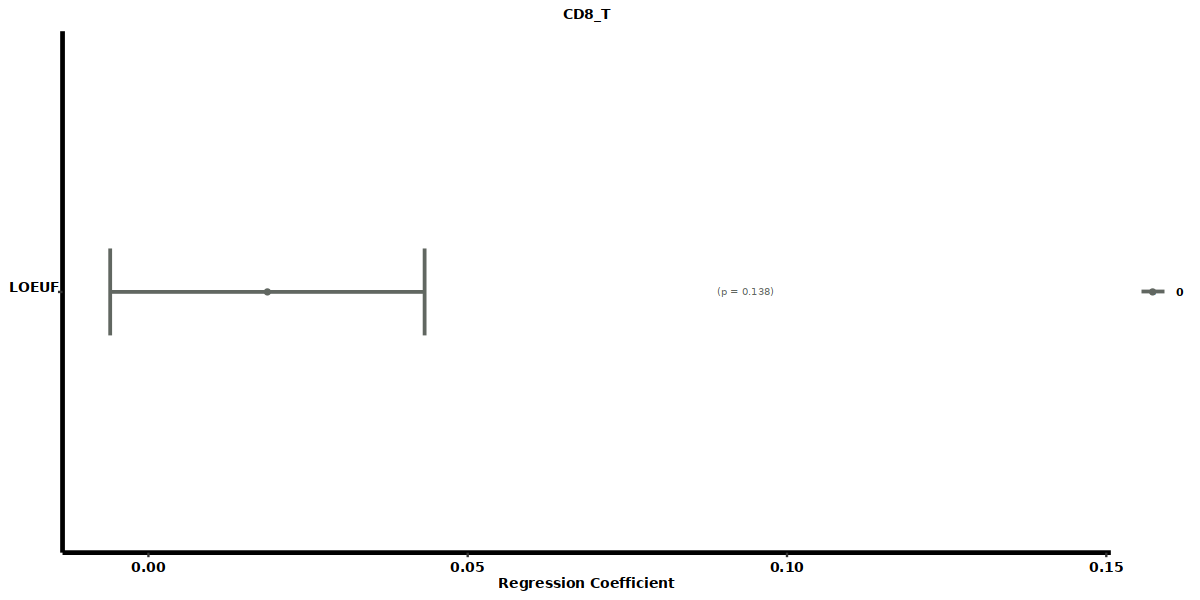

In [3476]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#047cbb", "0"="#616761")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [3477]:
pdf(paste0('figures/I1/I1_Residual_Model_', model_form , cell_type, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

## GO  model

In [3478]:
### Scale features to use in model

In [3479]:
# Define the columns to scale as a character vector
cols_to_scale <- c("weighted_mean_expression" ,'CDS_length',  'connect_quantile','GO_BP_count_400_auc', 'hs', 'length', 'LOEUF', 'pLI',  'PPI_degree_quantile', 'promoter_count', 'Roadmap_count',
                  'Roadmap_length_per_type','TSSD' )

# Apply scaling to the selected columns only
egene_data_scaled = egene_data
egene_data_scaled[cols_to_scale] <-lapply(egene_data_scaled[cols_to_scale], function(x) as.numeric(scale(x)))
                                            
#coegene_data_scaled[cols_to_scale]  = lapply(coegene_data_scaled[cols_to_scale], function(x) (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))

In [3480]:
model_form = 'residuals ~ GO_BP_count_400_auc'

In [3481]:
test  = egene_data_scaled 
test$sign = as.numeric(test$sign)

res = residuals(glm(sign ~ weighted_mean_expression, data = test, family = 'binomial'))   # select the beta of the random snp instead

## Run model on residuals
        
test$residuals = res

result_model = glm(as.formula(model_form), data = test, family = 'gaussian')

#print(summary(result_model))
## Extract model results
confidence_int =confint(result_model)
model_summary = summary(result_model)

coef = cbind(as.data.frame(model_summary$coefficients), as.data.frame(confidence_int))
coef$variable = rownames(coef)



Waiting for profiling to be done...



In [3482]:
coef

,Estimate,Std. Error,t value,Pr(>|t|),2.5 %,97.5 %,variable
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-0.171948809,0.01247021,-13.7887693,2.400368e-41,-0.19638997,-0.14750765,(Intercept)
GO_BP_count_400_auc,0.003607569,0.01247339,0.2892211,7.724428e-01,-0.02083983,0.02805497,GO_BP_count_400_auc


In [3483]:
coef$sign = 0
coef$sign[coef$`Pr(>|t|)` < 0.05] = 1

In [3484]:
coef = coef[coef$variable != '(Intercept)',]

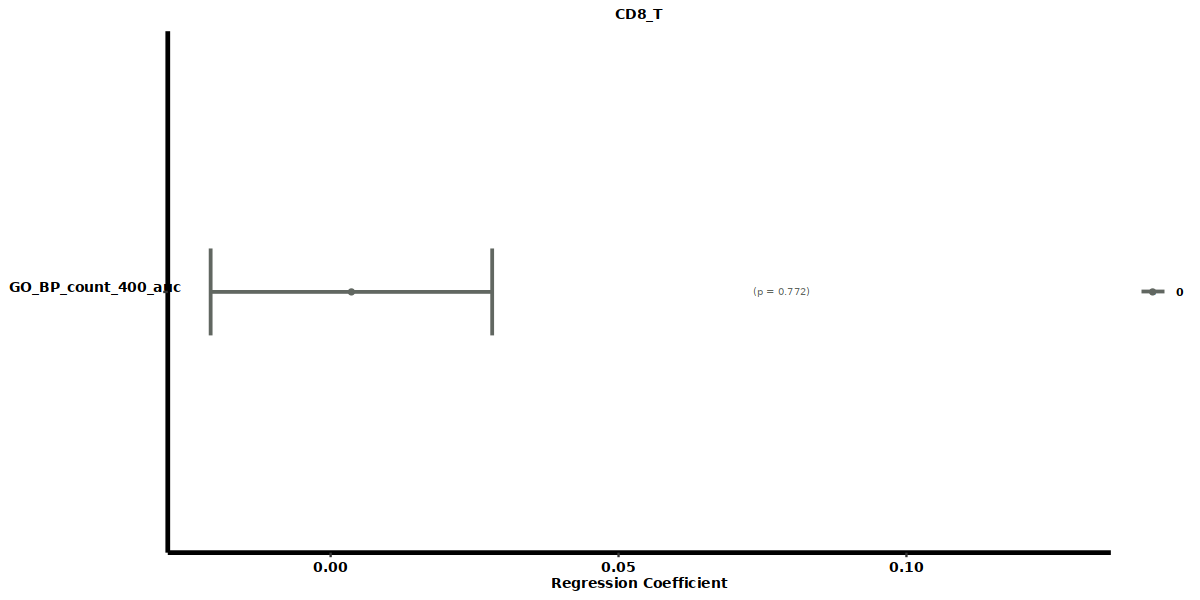

In [3485]:
options(repr.plot.width = 10,repr.plot.height =5)
model_plot = ggplot(coef, aes(x =variable, y = Estimate, color = as.character(sign))) +
  geom_point(size = 1) +                                  # Plot points
  geom_errorbar(aes(ymin =`2.5 %`, 
                    ymax = `97.5 %`), 
                width = 0.2, size = 0.8) + scale_color_manual(values = c("1" = "#047cbb", "0"="#616761")) + ggtitle(cell_type)  + coord_flip() +plot_config + theme(axis.title.y = element_blank()) + ylab('Regression Coefficient') + ylim(min(coef$`2.5 %`), max(coef$`97.5 %`) + 0.1) +  geom_text(aes(y = `97.5 %` +0.05
            , label =paste0( ' (p = ',  signif(`Pr(>|t|)`, digits = 3), ')')  ), size = 2)
model_plot

In [3486]:
pdf(paste0('figures/I1/I1_Residual_Model_', model_form , cell_type, '.pdf'), width =3.5, height = 1.2)
model_plot
dev.off()

pdf 
  2

## Other features

### Gene density

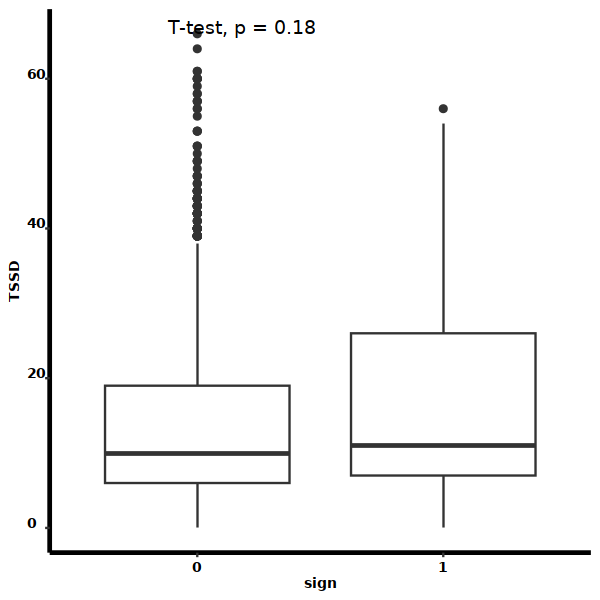

In [147]:
# Check out the enhancer length across biosamples from Roadmap
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=sign, y=TSSD)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

### Gene length

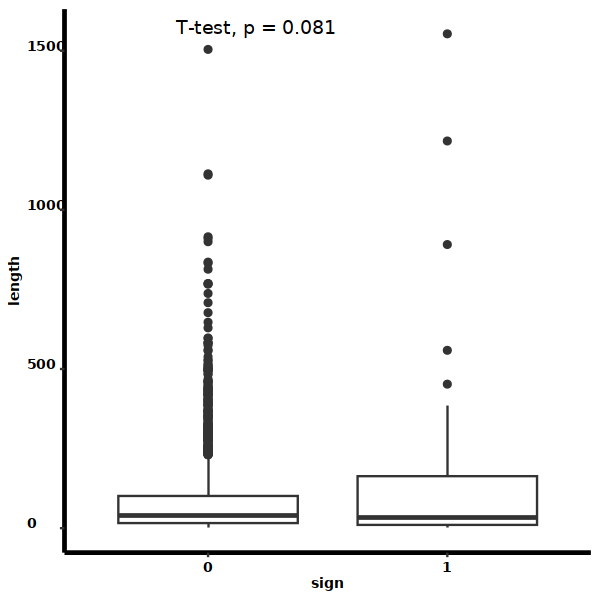

In [148]:
# Check out the enhancer length across biosamples from Roadmap
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=sign, y=length)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

In [334]:
egene_data %>% group_by(sign) %>% summarise(mean_length = mean(length))

sign,mean_length
<chr>,<dbl>
0,81.26178
1,139.99333


### CDS length

In [335]:
##length of the coding segments (in Kb)

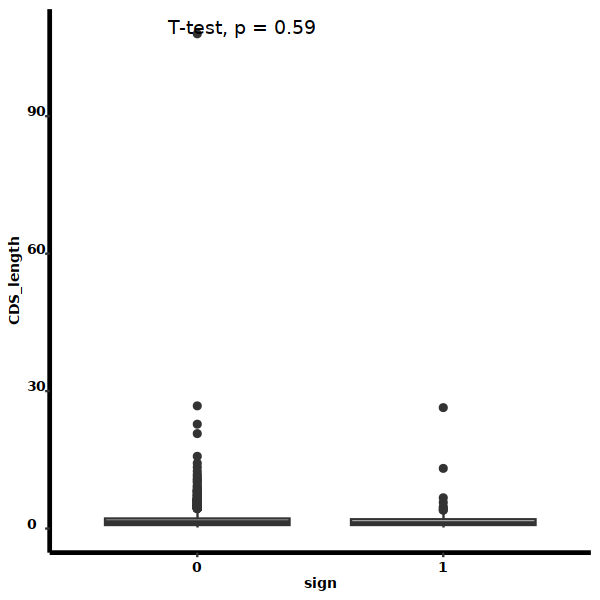

In [336]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(egene_data, aes(x=sign, y=CDS_length)) + 
    geom_boxplot() + plot_config + stat_compare_means(method = "t.test")

### TF indicator

In [337]:
amount_tfs = egene_data %>% group_by(TF,sign) %>% summarise(amounts = n()) %>% arrange(sign)

`summarise()` has grouped output by 'TF'. You can override using the `.groups`
argument.


In [338]:
input_matrix = amount_tfs %>% dcast(TF ~ sign, value.var = 'amounts')

In [339]:
input_matrix

TF,0,1
<int>,<int>,<int>
0,1727,75
1,119,3


In [340]:
rownames(input_matrix) = input_matrix$TF

In [341]:
input_matrix$TF = NULL

In [342]:
input_matrix = as.matrix(input_matrix)

In [343]:
input_matrix

,0,1
0,1727,75
1,119,3


In [181]:
fisher.test(input_matrix, alternative = "greater")

ERROR: Error in fisher.test(input_matrix, alternative = "greater"): all entries of 'x' must be nonnegative and finite


In [105]:
amount_tfs

TF,sign,amounts
<int>,<chr>,<int>
0,0,3221
1,0,227
0,1,480
1,1,40


In [101]:
40/(40+480)

[1] 0.07692308

In [100]:
227/(227+ 3221)

[1] 0.06583527

In [ ]:
matrix(c(3221